# Plots for EI Risk Policy Implications

In [1]:
#!pip install --force-reinstall -v "numpy==1.26.4"

In [3]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import geopandas as gpd
import matplotlib.pyplot as plt
sns.set_theme(style='white')

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = '/global/scratch/users/cristina_crespo/p1_data/'

ei_indicators = pd.read_csv(path+'out_final/ct_enhanced_fig_plotting_discussion.csv')

noprogrambyctdf = pd.read_csv("noprogrambyctdf.csv")

alleligibilitybyctdf = pd.read_csv("alleligibilitybyctdf.csv")

In [5]:
#dete alsaka and hawaii
print(len(ei_indicators))
print(len(noprogrambyctdf))
print(len(alleligibilitybyctdf))

ei_indicators = ei_indicators[~ei_indicators.state.isin([15, 2])]
noprogrambyctdf = noprogrambyctdf[~noprogrambyctdf.STATEFP.isin([15, 2])]
alleligibilitybyctdf = alleligibilitybyctdf[~alleligibilitybyctdf.STATEFP.isin([15, 2])]

print(len(ei_indicators))
print(len(noprogrambyctdf))
print(len(alleligibilitybyctdf))

82907
4099
635652
82316
3934
631561


In [6]:
list(alleligibilitybyctdf['Program Type'].unique())

['LIHEAP',
 'WAP',
 'Appliance Rebate, State/Utility Weatherization',
 'Electrical repairs',
 'Bill assistance',
 'No Program',
 'Appliance Rebate',
 'Winter Moratorium',
 'PIPP',
 'Budget billing',
 'State/Utility Weatherization',
 'Shutoff Protection',
 'Any heat-based protection',
 'Any cold-based protection',
 'HEEHRA',
 'State/Utility Weatherization, Appliance Rebate',
 'Appliance Rebate, Weatherization']

In [7]:
#len(alleligibilitybyctdf[alleligibilitybyctdf['Program Type'].isin(['Any heat-based protection',
#'Any cold-based protection'])].tract.unique())

In [8]:
#SI for number of programs and coverage
program_counts = alleligibilitybyctdf.drop_duplicates(['Program Name', 'Program Type', 'Utility'])
print(len(program_counts))
print(alleligibilitybyctdf.Utility.nunique())

4842
918


In [9]:
pd.DataFrame(program_counts.groupby(['Program Type'])['Utility'].count())

Utility
Program Type                                           
Any cold-based protection                           901
Any heat-based protection                           901
Appliance Rebate                                    111
Appliance Rebate, State/Utility Weatherization      159
Appliance Rebate, Weatherization                      1
Bill assistance                                      33
Budget billing                                        2
Electrical repairs                                    1
HEEHRA                                              165
LIHEAP                                              901
No Program                                          722
PIPP                                                  1
Shutoff Protection                                    1
State/Utility Weatherization                          6
State/Utility Weatherization, Appliance Rebate       17
WAP                                                 918
Winter Moratorium                                     2

In [8]:
alleligibilitybyctdf[alleligibilitybyctdf['Program Type'].isin(['Any heat-based protection',
 'Any cold-based protection'])]

Unnamed: 0  STATEFP  Average household members  \
4165          4165     39.0                        1.0   
4166          4166     42.0                        1.0   
4167          4167      6.0                        1.0   
4168          4168     34.0                        1.0   
4169          4169     22.0                        1.0   
...            ...      ...                        ...   
635644      635644     34.0                        6.0   
635645      635645     36.0                        6.0   
635646      635646     36.0                        6.0   
635647      635647     49.0                        6.0   
635648      635648     36.0                        6.0   

        Average household income         GEOID               Program Name  \
4165                26532.738095  3.912197e+10  Any heat-based protection   
4166                60872.924649  4.204302e+10  Any heat-based protection   
4167                54125.319693  6.059063e+09  Any heat-based protection   
4168                86801.220575  3.402580e+10  Any heat-based protection   
4169                31565.181518  2.207100e+10  Any heat-based protection   
...                          ...           ...                        ...   
635644             139245.637584  3.402972e+10  Any cold-based protection   
635645              87805.970149  3.608701e+10  Any cold-based protection   
635646              71282.386364  3.604705e+10  Any cold-based protection   
635647              40828.260870  4.904900e+10  Any cold-based protection   
635648              61815.596330  3.608701e+10  Any cold-based protection   

        HHSize_1               Program Type                        Utility  \
4165         0.0  Any heat-based protection                  OHIO POWER CO   
4166         0.0  Any heat-based protection    PPL ELECTRIC UTILITIES CORP   
4167         0.0  Any heat-based protection  SOUTHERN CALIFORNIA EDISON CO   
4168         0.0  Any heat-based protection   JERSEY CENTRAL POWER & LT CO   
4169         0.0  Any heat-based protection       ENTERGY NEW ORLEANS, LLC   
...          ...                        ...                            ...   
635644       NaN  Any cold-based protection   JERSEY CENTRAL POWER & LT CO   
635645       NaN  Any cold-based protection    ORANGE & ROCKLAND UTILS INC   
635646       NaN  Any cold-based protection  CONSOLIDATED EDISON CO-NY INC   
635647       NaN  Any cold-based protection                PROVO CITY CORP   
635648       NaN  Any cold-based protection    ORANGE & ROCKLAND UTILS INC   

       Eligible  HHSize_2  HHSize_3  HHSize_4  HHSize_5  HHSize_6  
4165        Yes       NaN       NaN       NaN       NaN       NaN  
4166        Yes       NaN       NaN       NaN       NaN       NaN  
4167        Yes       NaN       NaN       NaN       NaN       NaN  
4168        Yes       NaN       NaN       NaN       NaN       NaN  
4169        Yes       NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...       ...  
635644      Yes       NaN       NaN       NaN       NaN       0.0  
635645      Yes       NaN       NaN       NaN       NaN       0.0  
635646      Yes       NaN       NaN       NaN       NaN       0.0  
635647      Yes       NaN       NaN       NaN       NaN       0.0  
635648      Yes       NaN       NaN       NaN       NaN       0.0  

[170912 rows x 15 columns]

## SI Figure - correlate income with each indicator

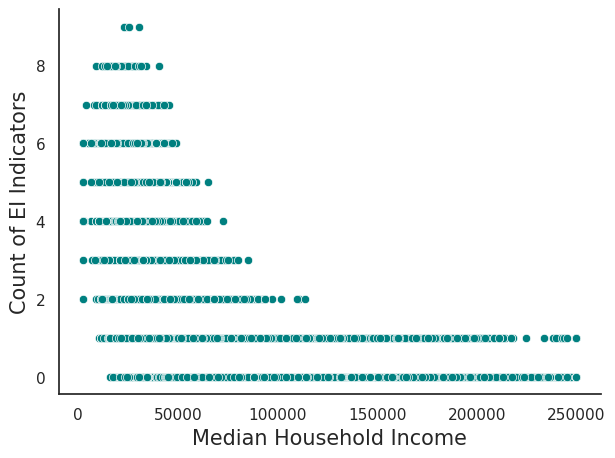

In [9]:
# Drop any rows with NaN or infinite values in 'Count EI indicators' and 'Median household income' columns
ei_indicators_cleaned = ei_indicators.replace([float('inf'), float('-inf')], pd.NA).dropna()


# Create the plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=ei_indicators_cleaned, x='Median household income', y='Count EI indicators', color = 'teal')
#sns.lineplot(data=ei_indicators_cleaned, x='Median household income', y='Count EI indicators', color="blue")

# Title and labels
#plt.title("Trend Between Median Household Income and Count of EI Indicators")
plt.xlabel("Median Household Income", fontsize = 15)
plt.ylabel("Count of EI Indicators", fontsize = 15)

sns.despine()

plt.savefig('rel_income_ei.pdf')

## Figure 6 main text 

This first part you dont need to run all the time

In [24]:
program_type_plotting = {
    'LIHEAP': 'Bill assistance',
    'Bill assistance': 'Bill assistance',
    'Budget billing' : 'Bill assistance',
    'PIPP':'Bill assistance',
    'Winter Moratorium' : 'Shutoff protection',
    'Shutoff Protection' : 'Shutoff protection',
    'Appliance Rebate': 'Appliance rebate',
    'Appliance Rebate, State/Utility Weatherization': 'Appliance rebate',
    'WAP': 'Weatherization',
    'State/Utility Weatherization': 'Weatherization',
    'Appliance Rebate, State/Utility Weatherization': 'Weatherization',
    'Electrical repairs':'Weatherization',
    'No Program':'No Program',
    'Shareholder dividend':'Bill assistance',
    'Any heat-based protection': 'Shutoff protection',
    'Any cold-based protection': 'Shutoff protection',
    'HEEHRA': 'Appliance rebate',
}



 
program_scope_plotting = {
    'LIHEAP': 'Federal',
    'Bill assistance': 'State/Utility',
    'Budget billing' : 'State/Utility',
    'PIPP':'State/Utility',
    'Winter Moratorium' : 'State/Utility',
    'Shutoff Protection' : 'State/Utility',
    'Appliance Rebate': 'State/Utility',
    'Appliance Rebate, State/Utility Weatherization': 'State/Utility',
    'WAP': 'Federal',
    'State/Utility Weatherization': 'State/Utility',
    'Appliance Rebate, State/Utility Weatherization': 'State/Utility',
    'Electrical repairs':'State/Utility',
    'No Program':'No Program',
    'Shareholder dividend':'State/Utility',
    'Any heat-based protection': 'State/Utility',
    'Any cold-based protection': 'State/Utility',
    'HEEHRA': 'Federal'
}

alleligibilitybyctdf['ProgramType_plotting'] = alleligibilitybyctdf['Program Type'].map(program_type_plotting)
alleligibilitybyctdf['ProgramScope_plotting'] = alleligibilitybyctdf['Program Type'].map(program_scope_plotting)

In [25]:
alleligibilitybyctdf['GEOID'] = alleligibilitybyctdf['GEOID'].astype(int)
ei_indicators['GEOID'] = ei_indicators['GEOID'].astype(int)
noprogrambyctdf['GEOID'] = noprogrambyctdf['GEOID'].astype(int)

In [26]:
alleligibilitybyctdf = pd.merge(ei_indicators, alleligibilitybyctdf, on="GEOID", how="right", indicator=True)
noprogrambyctdf = pd.merge(ei_indicators, noprogrambyctdf, on="GEOID", how="inner")

In [27]:
#checking why the merge was weird
matched_df = alleligibilitybyctdf[alleligibilitybyctdf['_merge'] == 'both']
unmatched_df = alleligibilitybyctdf[alleligibilitybyctdf['_merge'] == 'right_only']
unmatched_df.to_csv('unmatched_rows.csv', index=False)
alleligibilitybyctdf['GEOID'].nunique()
ei_indicators.shape[0]
unmatched_df['GEOID'].nunique()
matched_df['GEOID'].nunique()
#EI indicators has 70476 tracts, and eligibilitybyct has 82907 tracts
#so 12431 tracts with Y/N for program eligibility, but no EI Risk Level, therefore not plotted

82316

In [28]:
noprogramcountsbyei = noprogrambyctdf['EI Level'].value_counts()
noprogramcountsbyei

EI Level
Not EI          3487
Risk Level 1     292
Risk Level 2     119
Risk Level 3      36
Name: count, dtype: int64

In [29]:
#cleaning duplicate eligibility type columns and those not included in energy assistance program definition
drop = ['No Program', 'Renewable Energy Net Metering', 'Electrical repairs']
alleligibilitybyctdf = alleligibilitybyctdf[~alleligibilitybyctdf['Program Type'].isin(drop)]

duplicates = {
    'Appliance Rebate, State/Utility Weatherization': ['Appliance Rebate', 'State/Utility Weatherization'],
    'Appliance Rebate, Weatherization': ['Appliance Rebate', 'State/Utility Weatherization'],
    'State/Utility Weatherization, Appliance Rebate': ['State/Utility Weatherization', 'Appliance Rebate']
}
for original_group, new_groups in duplicates.items():
    for new_group in new_groups:
        matching_rows = alleligibilitybyctdf[alleligibilitybyctdf['Program Type'] == original_group].copy()
        matching_rows['Program Type'] = new_group
        alleligibilitybyctdf = pd.concat([alleligibilitybyctdf, matching_rows], ignore_index=True)
alleligibilitybyctdf = alleligibilitybyctdf[~alleligibilitybyctdf['Program Type'].isin(duplicates.keys())]

In [30]:
alleligibilitybyctdf.head(1)

Unnamed: 0_x        GEOID  state  county   tract  Median household income  \
0         56849  39121968402     39     121  968402                    26667   

   Average household members_x  Average household income_x  hh_mem  \
0                     1.345238                26532.738095       1   

   lim_income_120AMI  ...        Utility  Eligible  HHSize_2  HHSize_3  \
0            54700.0  ...  OHIO POWER CO       Yes       NaN       NaN   

   HHSize_4 HHSize_5  HHSize_6  ProgramType_plotting  ProgramScope_plotting  \
0       NaN      NaN       NaN       Bill assistance                Federal   

   _merge  
0    both  

[1 rows x 33 columns]

In [31]:
#listing all possible program type/scope combinations
program_types = alleligibilitybyctdf['ProgramType_plotting'].dropna().unique()
program_scopes = alleligibilitybyctdf['ProgramScope_plotting'].dropna().unique()
all_combinations = list(itertools.product(program_types, program_scopes))

#adding rows of missing program types for a 'Not Available' eligibility type
def add_missing_combinations(df, all_combinations):
    new_rows = []
    unique_tracts = df['GEOID'].unique()
    
    for tract in unique_tracts:
        existing_combinations = set(zip(df[df['GEOID'] == tract]['ProgramType_plotting'].dropna(), 
                                        df[df['GEOID'] == tract]['ProgramScope_plotting'].dropna()))
        
        missing_combinations = set(all_combinations) - existing_combinations
        
        for combination in missing_combinations:
            new_rows.append({'GEOID': tract, 'ProgramType_plotting': combination[0], 'ProgramScope_plotting': combination[1]})
    
    new_df = pd.DataFrame(new_rows)
    result_df = pd.concat([df, new_df], ignore_index=True)

    result_df.sort_values(by=['GEOID', 'ProgramType_plotting', 'ProgramScope_plotting'], inplace=True)
    
    return result_df

alleligibilitybyctdf = add_missing_combinations(alleligibilitybyctdf, all_combinations)
alleligibilitybyctdf['Eligible'] = alleligibilitybyctdf['Eligible'].fillna('Not Available')
alleligibilitybyctdf['EI Level'] = alleligibilitybyctdf.groupby('GEOID')['EI Level'].ffill().bfill()
alleligibilitybyctdf.head()
eligibilitycountsbyei = alleligibilitybyctdf.groupby(['ProgramType_plotting','ProgramScope_plotting', 'Eligible', 'EI Level']).size().unstack(fill_value=0)

In [32]:
eligibilitycountsbyei

EI Level                                                  Not EI  \
ProgramType_plotting ProgramScope_plotting Eligible                
Appliance rebate     Federal               No               5395   
                                           Not Available   47436   
                                           Yes             19646   
                     State/Utility         No               1016   
                                           Not Available   57517   
                                           Yes             16680   
Bill assistance      Federal               No             139620   
                                           Not Available    1311   
                                           Yes              1544   
                     State/Utility         No              24661   
                                           Not Available   59669   
                                           Yes               135   
Shutoff protection   Federal               Not Available   72477   
                     State/Utility         No               2399   
                                           Not Available    1311   
                                           Yes            151902   
Weatherization       Federal               No              74653   
                                           Yes              1902   
                     State/Utility         No              59496   
                                           Not Available   34905   
                                           Yes             86871   

EI Level                                                  Risk Level 1  \
ProgramType_plotting ProgramScope_plotting Eligible                      
Appliance rebate     Federal               No                       22   
                                           Not Available          4491   
                                           Yes                    2378   
                     State/Utility         No                       94   
                                           Not Available          5515   
                                           Yes                    1554   
Bill assistance      Federal               No                    10433   
                                           Not Available            97   
                                           Yes                    2456   
                     State/Utility         No                     2355   
                                           Not Available          5471   
                                           Yes                     342   
Shutoff protection   Federal               Not Available          6891   
                     State/Utility         No                       79   
                                           Not Available            97   
                                           Yes                   14404   
Weatherization       Federal               No                     4646   
                                           Yes                    2597   
                     State/Utility         No                     3078   
                                           Not Available          3377   
                                           Yes                   10899   

EI Level                                                  Risk Level 2  \
ProgramType_plotting ProgramScope_plotting Eligible                      
Appliance rebate     Federal               No                        0   
                                           Not Available          1687   
                                           Yes                    1029   
                     State/Utility         No                       11   
                                           Not Available          2166   
                                           Yes                     646   
Bill assistance      Federal               No                     3200   
                                           Not Available          

In [33]:
eligibilitycountsbyei = eligibilitycountsbyei.reset_index()
eligibilitycountsbyei.to_csv('main_fig_plt.csv')

### POLICY Fig - need to run all the time

In [10]:
eligibilitycountsbyei = pd.read_csv('main_fig_plt.csv')

Text(-0.1, 1.1, 'g')

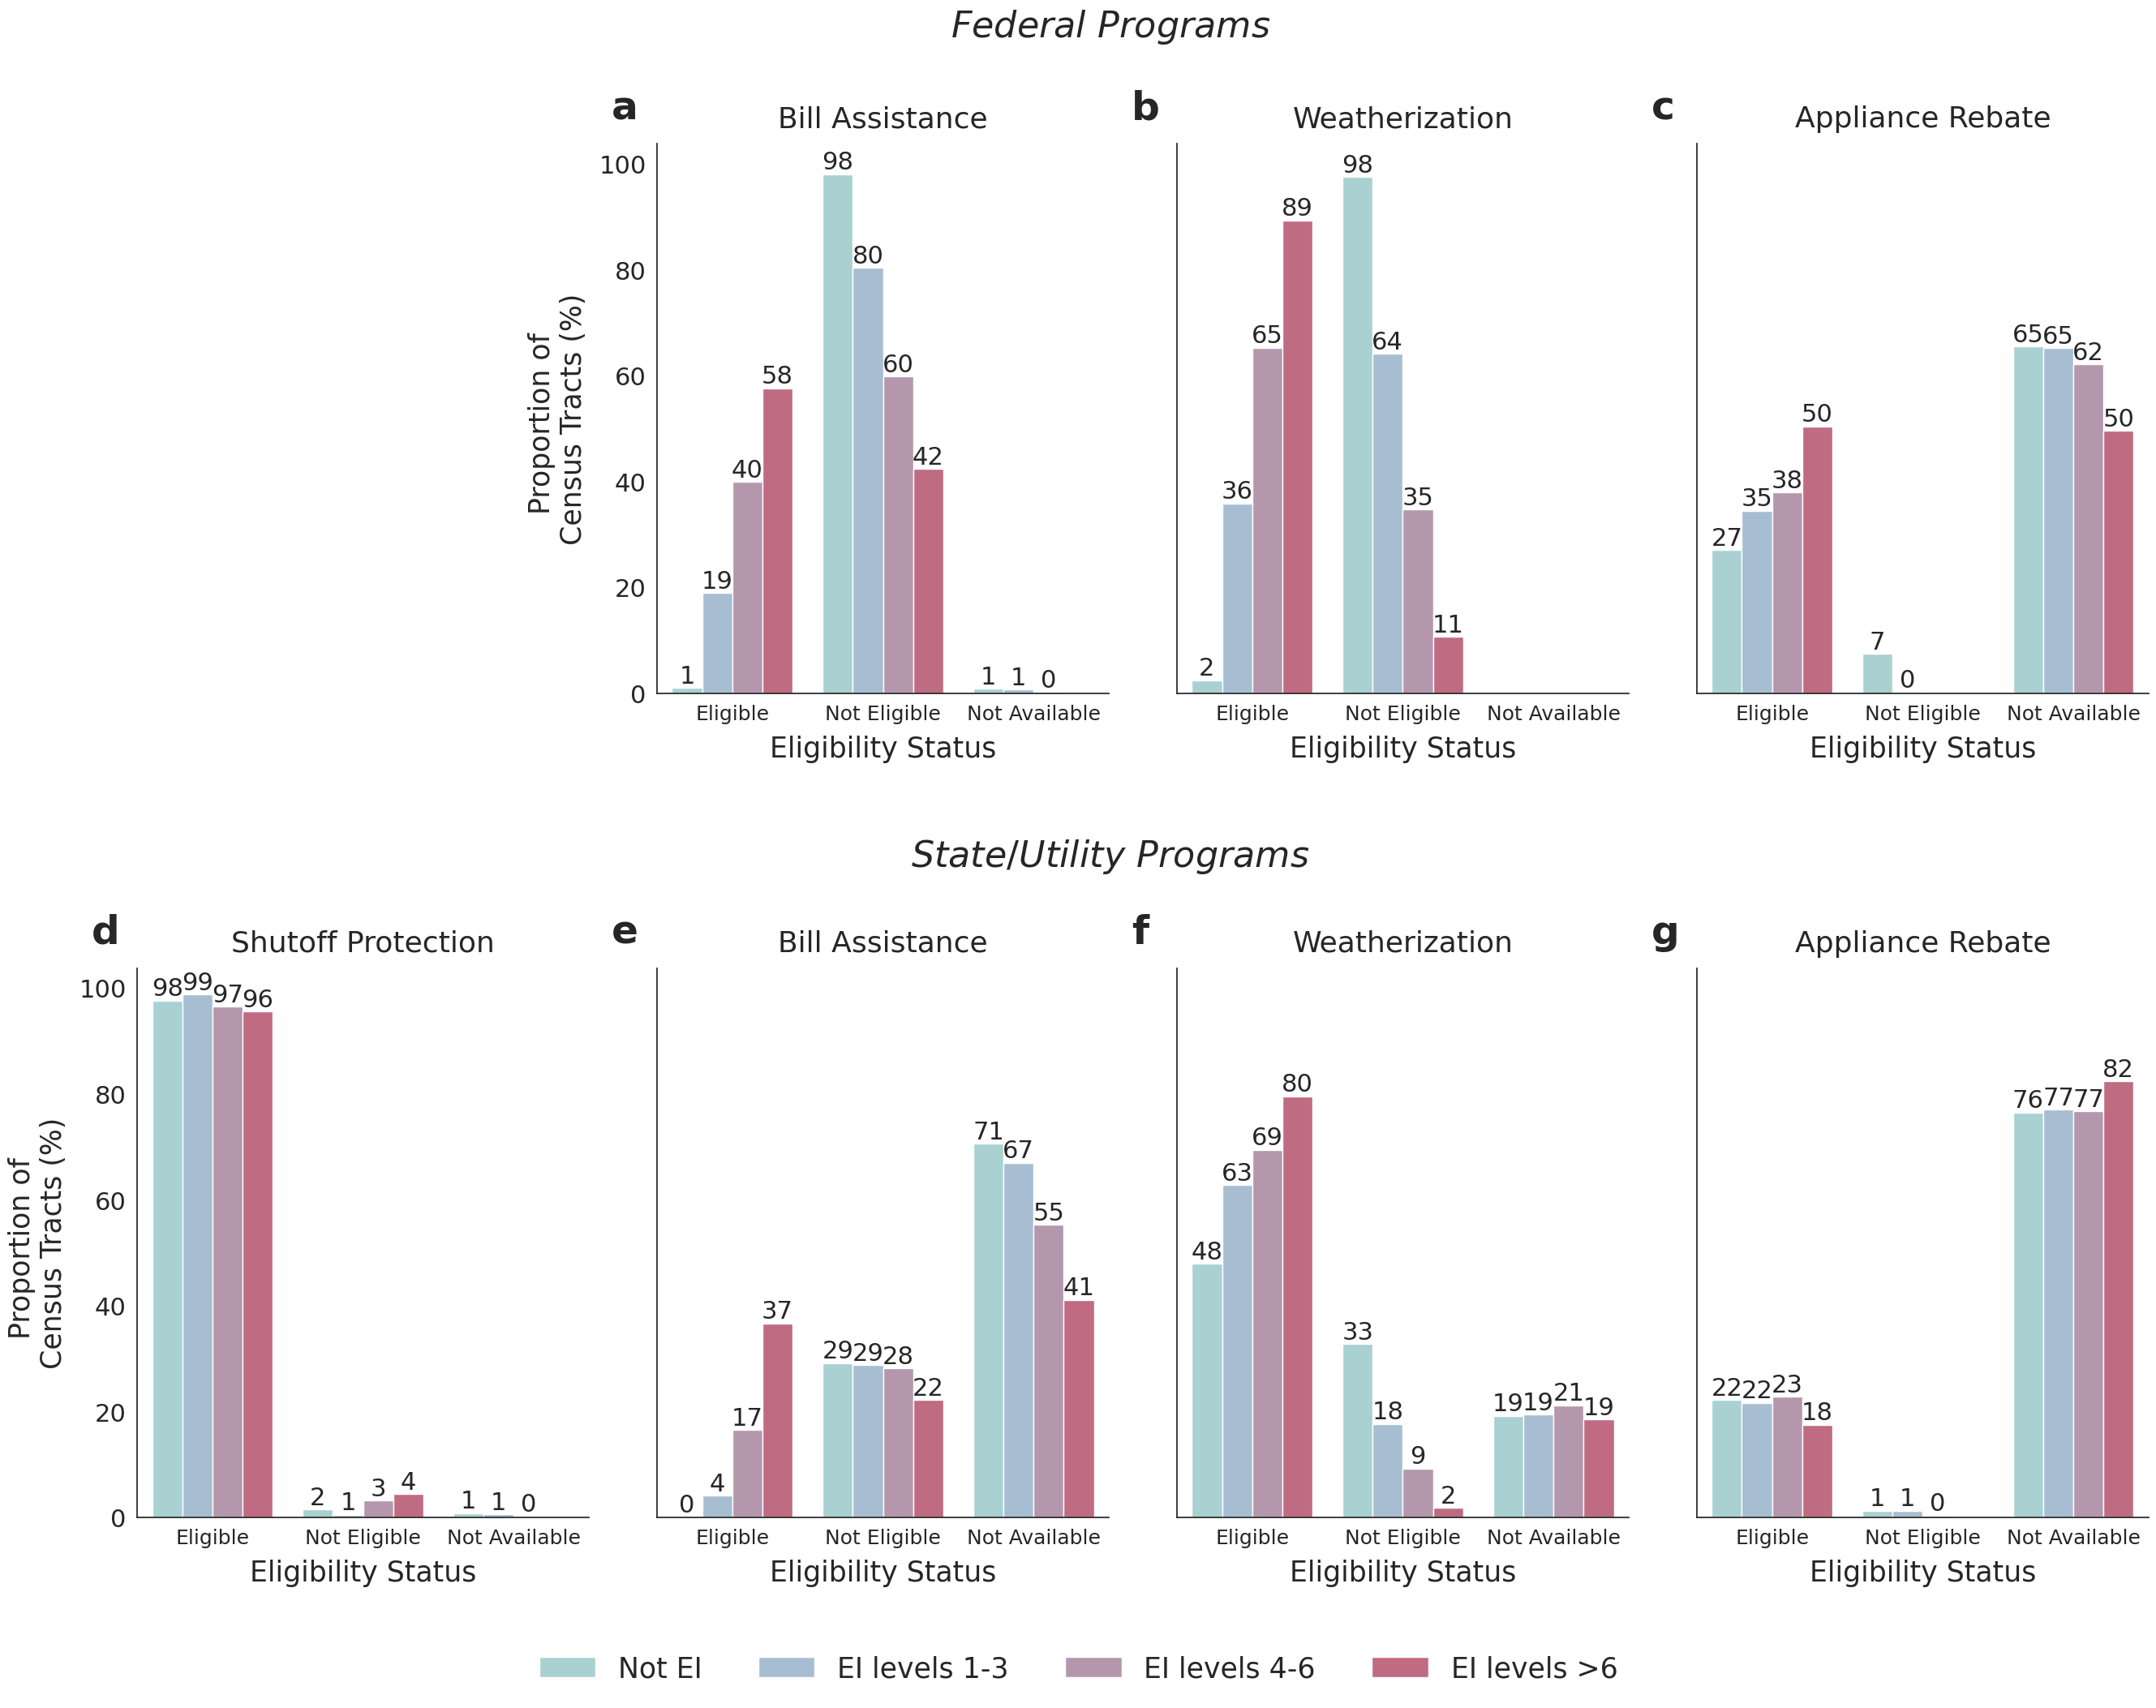

In [31]:

# Assuming eligibilitycountsbyei is loaded and preprocessed as follows
eligibilitycountsbyei['Eligible'] = eligibilitycountsbyei['Eligible'].replace({
    "Yes": "Eligible",
    "No": "Not Eligible",
    "Not Available": "Not Available"
})
eligibilitycountsbyei.rename(columns={'ProgramType_plotting': 'Program Type', 'ProgramScope_plotting': 'Program_Scope'}, inplace=True)

# Data preparation
df_long2 = (
    eligibilitycountsbyei
    .melt(id_vars=['Program Type', 'Eligible', 'Program_Scope'], 
          value_vars=['Not EI', 'Risk Level 1', 'Risk Level 2', 'Risk Level 3'], 
          var_name='Risk_Level', value_name='Count')
    .assign(Risk_Level=lambda df: pd.Categorical(df['Risk_Level'], 
                                                  categories=['Not EI', 'Risk Level 1', 'Risk Level 2', 'Risk Level 3'], 
                                                  ordered=True))
    .assign(Eligible=lambda df: pd.Categorical(df['Eligible'], 
                                               categories=['Eligible', 'Not Eligible', 'Not Available'], 
                                               ordered=True))
    .groupby(['Risk_Level', 'Program Type', 'Program_Scope', 'Eligible'])
    .agg(Total_by_Program=('Count', 'sum'))
    .reset_index()
)

# Calculate percentages
df_long2['Percent'] = (df_long2['Total_by_Program'] / df_long2.groupby(['Risk_Level', 'Program_Scope', 'Program Type'])['Total_by_Program'].transform('sum')) * 100


risk_colors =['#a3d8d8', '#9acce0', '#a0bed9', '#a9b0ce', '#b2a1c0', '#ba92b0', '#c2829f', '#c8718d', '#cd5e7b', '#d04969']

# Update Risk_Level labels
df_long2['Risk_Level'] = df_long2['Risk_Level'].replace({
    'Risk Level 1': 'EI levels 1-3',
    'Risk Level 2': 'EI levels 4-6',
    'Risk Level 3': 'EI levels >6'
})

# Update color palette accordingly
custom_palette = {
    'Not EI': risk_colors[0],  # 0
    'EI levels 1-3': risk_colors[2],  # 1-3
    'EI levels 4-6': risk_colors[5],  # 4-6
    'EI levels >6': risk_colors[8]  # 7-9
}


# Dictionary for plots layout
plots_info = {
    (0, 1): (('Bill assistance', 'Federal'), 'Bill Assistance'),
    (0, 2): (('Weatherization', 'Federal'), 'Weatherization'),
    (0, 3): (('Appliance rebate', 'Federal'), 'Appliance Rebate'),  # NEW FIGURE
    (1, 0): (('Shutoff protection', 'State/Utility'), 'Shutoff Protection'),
    (1, 1): (('Bill assistance', 'State/Utility'), 'Bill Assistance'),
    (1, 2): (('Weatherization', 'State/Utility'), 'Weatherization'),
    (1, 3): (('Appliance rebate', 'State/Utility'), 'Appliance Rebate')
}

# Set up the plot grid
# Increase figure height and hspace for breathing room
fig, axes = plt.subplots(2, 4, figsize=(32, 22), sharey=True)  # taller fig
plt.subplots_adjust(wspace=0.15, hspace=0.5)  # more vertical spacing

# Centered italicized row titles
fig.text(0.5, 0.94, r"$\it{Federal\ Programs}$", ha='center', fontsize=32)
fig.text(0.5, 0.475, r"$\it{State/Utility\ Programs}$", ha='center', fontsize=32)

for (row, col), ((program_type, program_scope), title) in plots_info.items():
    ax = axes[row, col]
    subset = df_long2[(df_long2['Program Type'] == program_type) & (df_long2['Program_Scope'] == program_scope)]
    if subset.empty:
        ax.axis('off')
    else:
        sns.barplot(
            data=subset, 
            x='Eligible', 
            y='Percent', 
            hue='Risk_Level', 
            palette=custom_palette,
            ax=ax
        )
        ax.set_title(title, fontsize=26, pad=15)  # Increase title font size
        ax.set_xlabel('Eligibility Status', fontsize=25, labelpad=10)  # Adjust x-label font size
        ax.set_ylabel('')  # Adjust y-label font size
        
            
        for c in ax.containers:
            labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=22)  # Increase label font size
        
        ax.set_xticklabels(['Eligible', 'Not Eligible', 'Not Available'], rotation=0, ha='center', fontsize=18)
        ax.legend_.remove()
        
        # Despine top and right sides
        sns.despine(ax=ax, top=True, right=True)

# Turn off unused subplots
axes[0, 0].axis('off')
#axes[0, 3].axis('off')

# Central legend
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(custom_palette), fontsize=25, frameon=False)

axes[0, 1].set_ylabel('Proportion of \nCensus Tracts (%)', fontsize=25, labelpad=10)
axes[1, 0].set_ylabel('Proportion of \nCensus Tracts (%)', fontsize=25, labelpad=10)

axes[0, 1].yaxis.set_tick_params(labelbottom=True)
axes[0, 1].tick_params(axis='y', labelsize=22)  # Set the font size for y-axis tick labels
axes[1, 0].tick_params(axis='y', labelsize=22)  # Set the font size for y-axis tick labels


axes[0, 1].text(-0.1, 1.1, 'a', transform=axes[0, 1].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[0, 2].text(-0.1, 1.1, 'b', transform=axes[0, 2].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[0, 3].text(-0.1, 1.1, 'c', transform=axes[0, 3].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 0].text(-0.1, 1.1, 'd', transform=axes[1, 0].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 1].text(-0.1, 1.1, 'e', transform=axes[1, 1].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 2].text(-0.1, 1.1, 'f', transform=axes[1, 2].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 3].text(-0.1, 1.1, 'g', transform=axes[1, 3].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')


In [32]:
fig.savefig("fig_policy_counts.pdf", bbox_inches='tight', transparent=False, facecolor='white')

Text(-0.1, 1.1, 'g')

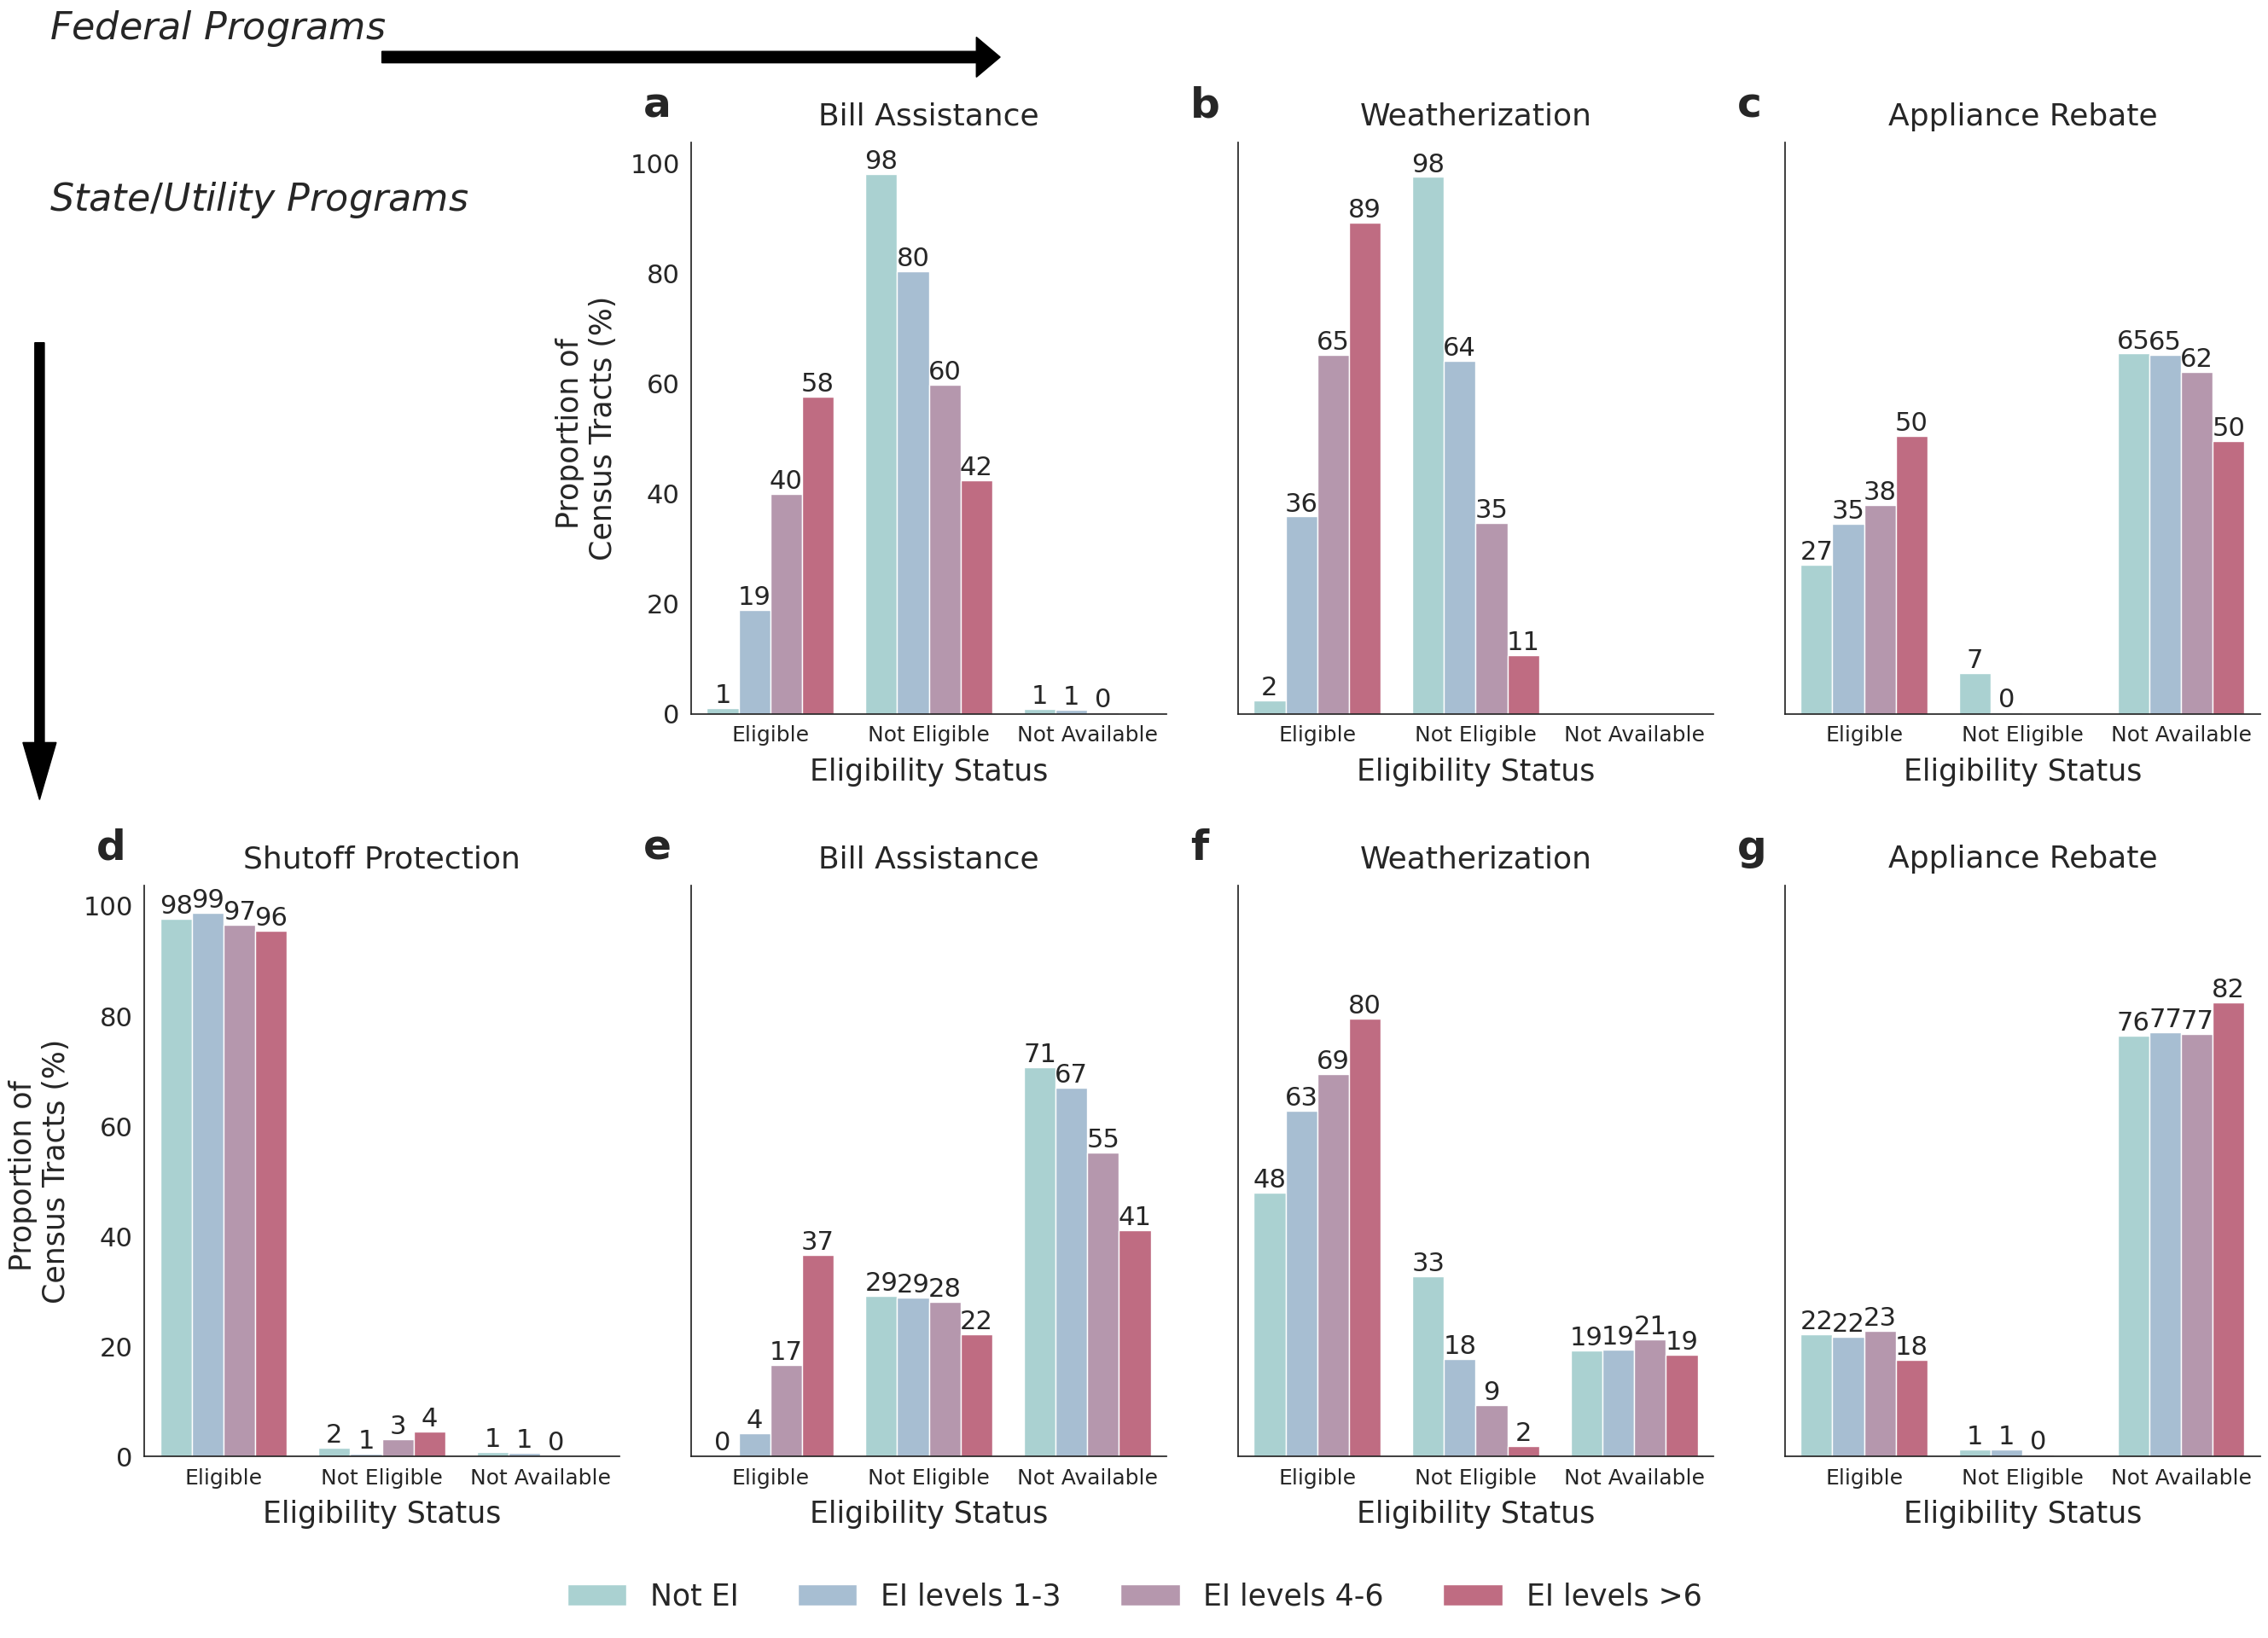

In [30]:

# Assuming eligibilitycountsbyei is loaded and preprocessed as follows
eligibilitycountsbyei['Eligible'] = eligibilitycountsbyei['Eligible'].replace({
    "Yes": "Eligible",
    "No": "Not Eligible",
    "Not Available": "Not Available"
})
eligibilitycountsbyei.rename(columns={'ProgramType_plotting': 'Program Type', 'ProgramScope_plotting': 'Program_Scope'}, inplace=True)

# Data preparation
df_long2 = (
    eligibilitycountsbyei
    .melt(id_vars=['Program Type', 'Eligible', 'Program_Scope'], 
          value_vars=['Not EI', 'Risk Level 1', 'Risk Level 2', 'Risk Level 3'], 
          var_name='Risk_Level', value_name='Count')
    .assign(Risk_Level=lambda df: pd.Categorical(df['Risk_Level'], 
                                                  categories=['Not EI', 'Risk Level 1', 'Risk Level 2', 'Risk Level 3'], 
                                                  ordered=True))
    .assign(Eligible=lambda df: pd.Categorical(df['Eligible'], 
                                               categories=['Eligible', 'Not Eligible', 'Not Available'], 
                                               ordered=True))
    .groupby(['Risk_Level', 'Program Type', 'Program_Scope', 'Eligible'])
    .agg(Total_by_Program=('Count', 'sum'))
    .reset_index()
)

# Calculate percentages
df_long2['Percent'] = (df_long2['Total_by_Program'] / df_long2.groupby(['Risk_Level', 'Program_Scope', 'Program Type'])['Total_by_Program'].transform('sum')) * 100


risk_colors =['#a3d8d8', '#9acce0', '#a0bed9', '#a9b0ce', '#b2a1c0', '#ba92b0', '#c2829f', '#c8718d', '#cd5e7b', '#d04969']

# Update Risk_Level labels
df_long2['Risk_Level'] = df_long2['Risk_Level'].replace({
    'Risk Level 1': 'EI levels 1-3',
    'Risk Level 2': 'EI levels 4-6',
    'Risk Level 3': 'EI levels >6'
})

# Update color palette accordingly
custom_palette = {
    'Not EI': risk_colors[0],  # 0
    'EI levels 1-3': risk_colors[2],  # 1-3
    'EI levels 4-6': risk_colors[5],  # 4-6
    'EI levels >6': risk_colors[8]  # 7-9
}


# Dictionary for plots layout
plots_info = {
    (0, 1): (('Bill assistance', 'Federal'), 'Bill Assistance'),
    (0, 2): (('Weatherization', 'Federal'), 'Weatherization'),
    (0, 3): (('Appliance rebate', 'Federal'), 'Appliance Rebate'),  # NEW FIGURE
    (1, 0): (('Shutoff protection', 'State/Utility'), 'Shutoff Protection'),
    (1, 1): (('Bill assistance', 'State/Utility'), 'Bill Assistance'),
    (1, 2): (('Weatherization', 'State/Utility'), 'Weatherization'),
    (1, 3): (('Appliance rebate', 'State/Utility'), 'Appliance Rebate')
}

# Set up the plot grid
# Increase figure height and hspace for breathing room
# Keep default figure size but annotate from top-left
# Create figure and axes
fig, axes = plt.subplots(2, 4, figsize=(32, 20), sharey=True)
plt.subplots_adjust(wspace=0.15, hspace=0.3)

# Turn off unused first subplot
axes[0, 0].axis('off')

# === Title for Federal row ===
axes[0, 0].text(
    -0.2, 1.2,
    r"$\bf{\it{Federal\ Programs}}$",
    transform=axes[0, 0].transAxes,
    fontsize=32,
    va='center', ha='left'
)

arrow_right = mpatches.FancyArrow(
    x=0.5, y=1.15, dx=1.3, dy=0,
    width=0.02,
    length_includes_head=True,
    head_width=0.07,
    head_length=0.05,
    color='black',
    transform=axes[0, 0].transAxes,
    clip_on=False
)
axes[0, 0].add_patch(arrow_right)

# === Title for State/Utility row ===
axes[0, 0].text(
    -0.2, 0.9,
    r"$\bf{\it{State/Utility\ Programs}}$",
    transform=axes[0, 0].transAxes,
    fontsize=32,
    va='center', ha='left'
)

arrow_down = mpatches.FancyArrow(
    x=-0.22, y=0.65, dx=0, dy=-0.8,
    width=0.02,
    length_includes_head=True,
    head_width=0.07,
    head_length=0.1,
    color='black',
    transform=axes[0, 0].transAxes,
    clip_on=False
)
axes[0, 0].add_patch(arrow_down)

for (row, col), ((program_type, program_scope), title) in plots_info.items():
    ax = axes[row, col]
    subset = df_long2[(df_long2['Program Type'] == program_type) & (df_long2['Program_Scope'] == program_scope)]
    if subset.empty:
        ax.axis('off')
    else:
        sns.barplot(
            data=subset, 
            x='Eligible', 
            y='Percent', 
            hue='Risk_Level', 
            palette=custom_palette,
            ax=ax
        )
        ax.set_title(title, fontsize=26, pad=15)  # Increase title font size
        ax.set_xlabel('Eligibility Status', fontsize=25, labelpad=10)  # Adjust x-label font size
        ax.set_ylabel('')  # Adjust y-label font size
        
            
        for c in ax.containers:
            labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=22)  # Increase label font size
        
        ax.set_xticklabels(['Eligible', 'Not Eligible', 'Not Available'], rotation=0, ha='center', fontsize=18)
        ax.legend_.remove()
        
        # Despine top and right sides
        sns.despine(ax=ax, top=True, right=True)

# Turn off unused subplots
axes[0, 0].axis('off')
#axes[0, 3].axis('off')

# Central legend
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(custom_palette), fontsize=25, frameon=False)

axes[0, 1].set_ylabel('Proportion of \nCensus Tracts (%)', fontsize=25, labelpad=10)
axes[1, 0].set_ylabel('Proportion of \nCensus Tracts (%)', fontsize=25, labelpad=10)

axes[0, 1].yaxis.set_tick_params(labelbottom=True)
axes[0, 1].tick_params(axis='y', labelsize=22)  # Set the font size for y-axis tick labels
axes[1, 0].tick_params(axis='y', labelsize=22)  # Set the font size for y-axis tick labels


axes[0, 1].text(-0.1, 1.1, 'a', transform=axes[0, 1].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[0, 2].text(-0.1, 1.1, 'b', transform=axes[0, 2].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[0, 3].text(-0.1, 1.1, 'c', transform=axes[0, 3].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 0].text(-0.1, 1.1, 'd', transform=axes[1, 0].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 1].text(-0.1, 1.1, 'e', transform=axes[1, 1].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 2].text(-0.1, 1.1, 'f', transform=axes[1, 2].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
axes[1, 3].text(-0.1, 1.1, 'g', transform=axes[1, 3].transAxes, fontsize=35, fontweight='bold', va='top', ha='left')




### All indicator - geographical extent

Text(0.05, 1.01, 'a')

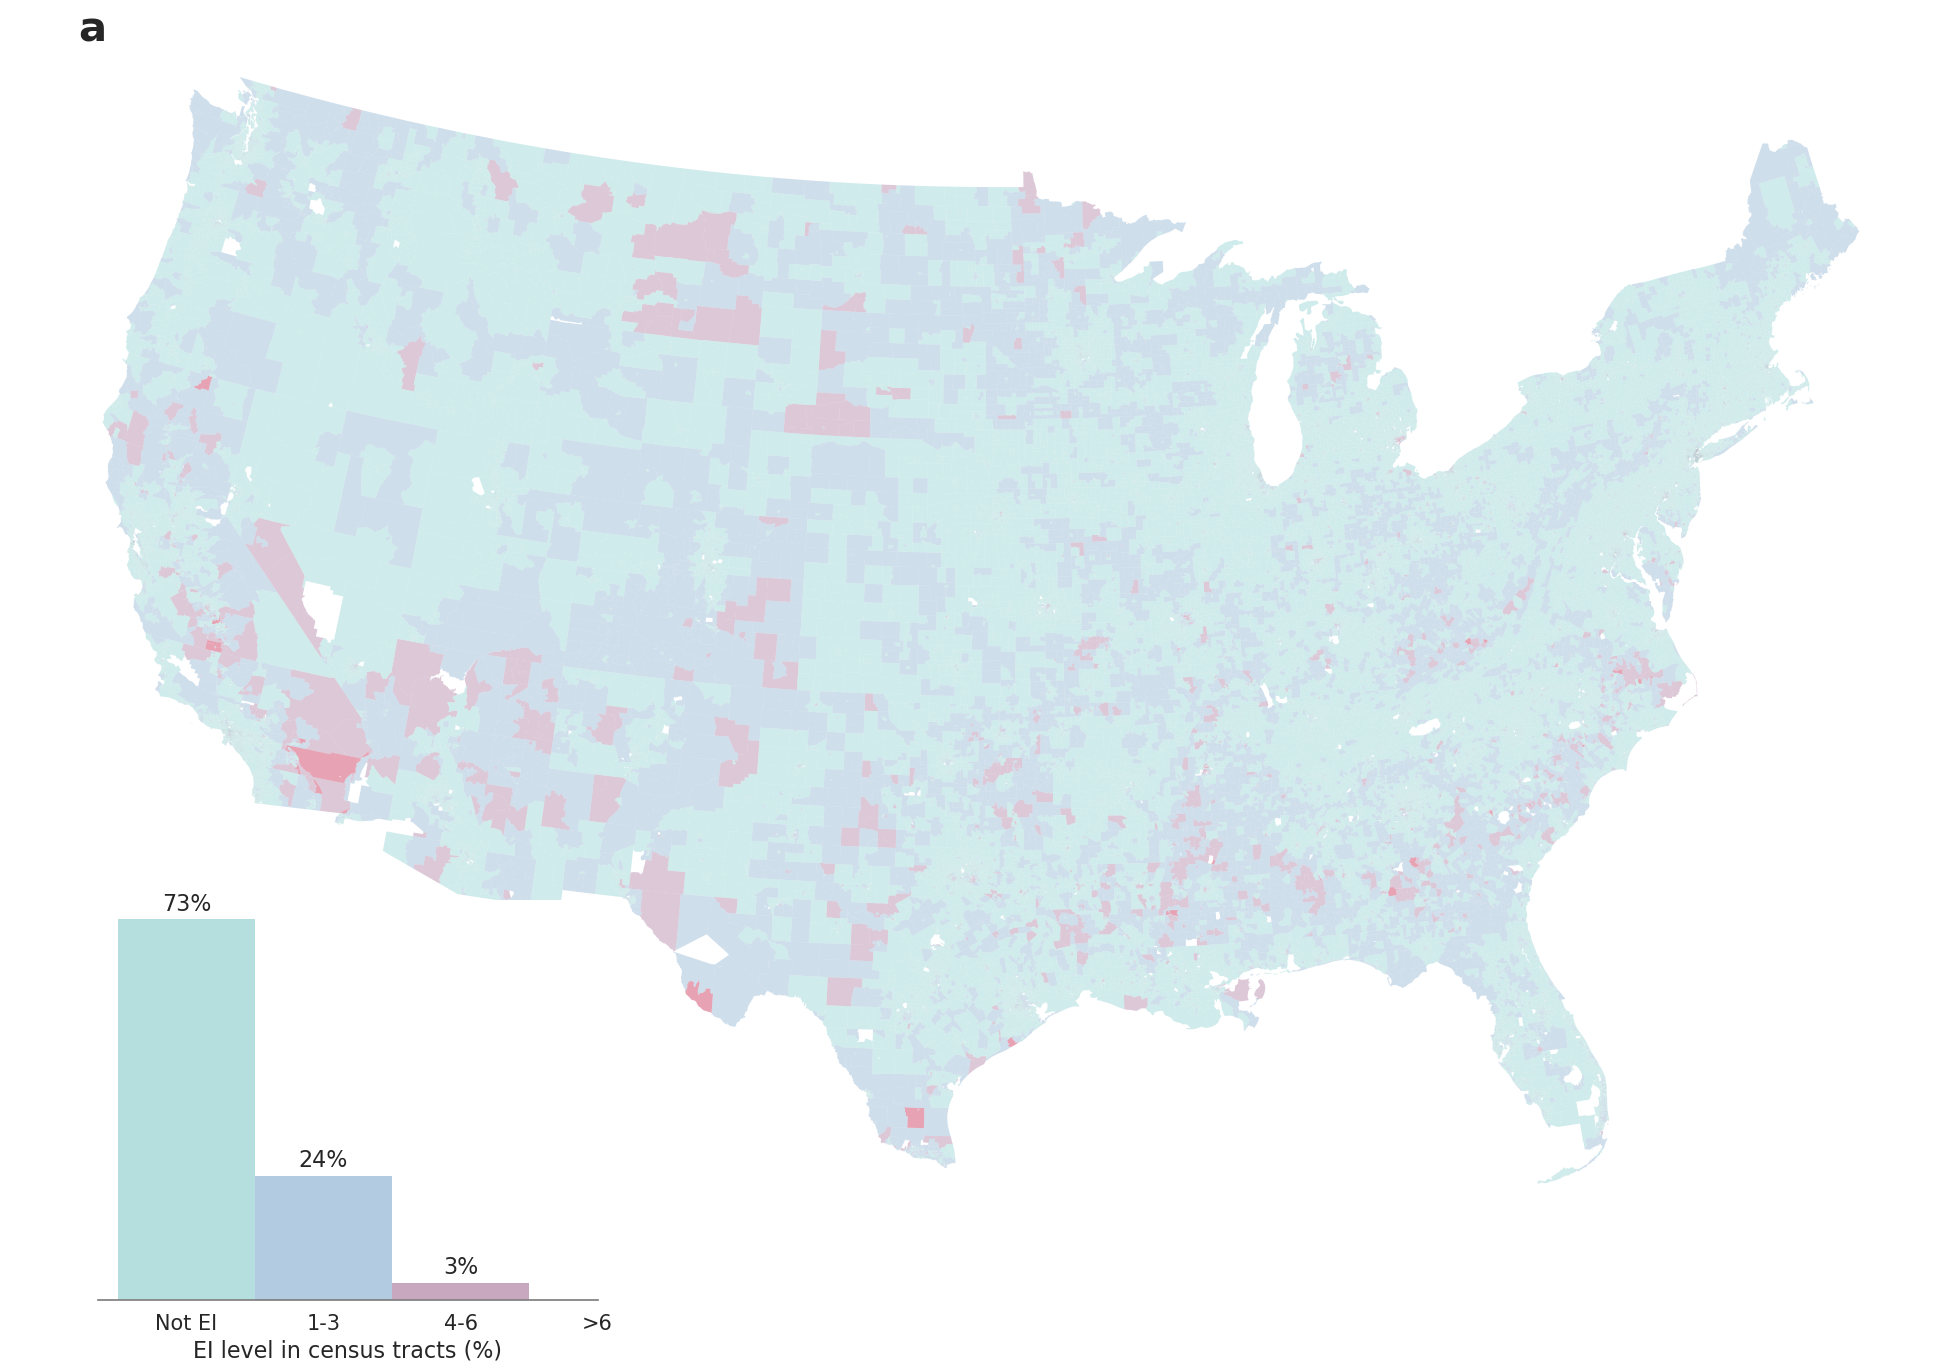

In [38]:
# Load census tract shapefile
tracts = gpd.read_file('/global/scratch/users/cristina_crespo/p1_data/in_us_census/2020_gis_tracts/2020_us_tracts.shp')
tracts = tracts.to_crs("ESRI:102003")  # Convert to appropriate CRS

# Remove Alaska and Hawaii
tracts = tracts[~tracts.STATEFP.isin(["02", "15"])]

# Ensure consistent GEOID format
ei_indicators['GEOID'] = ei_indicators['GEOID'].astype(str).str.zfill(11)
tracts['GEOID'] = tracts['GEOID'].astype(str)

# Merge shapefile with EI Count data
tracts = tracts.merge(ei_indicators[['GEOID', 'Count EI indicators']], on='GEOID', how='right')

# Define four risk colors
#risk_colors =['#a3d8d8', '#9acce0', '#a0bed9', '#a9b0ce', '#b2a1c0', '#ba92b0', '#c2829f', '#c8718d', '#cd5e7b', '#d04969']
risk_colors_hist = ['#a3d8d8', '#a0bed9', '#ba92b0', '#d04969']  # Only 4 colors

# **Update color mapping logic**
bins = [-1, 0, 3, 6, np.inf]  # Define bin edges
labels = [0, 1, 2, 3]  # Corresponding categories

# Assign category index based on 'Count EI indicators'
tracts['color_idx'] = pd.cut(tracts['Count EI indicators'], bins=bins, labels=labels).astype(int)

# Map each level to one of the 4 colors
tracts['color'] = tracts['color_idx'].map(lambda idx: risk_colors_hist[idx])

# Create figure and axis
fig, ax = plt.subplots(figsize=(25, 20))

# Creating the EI_level column based on the same bins
tracts['EI level'] = pd.cut(tracts['Count EI indicators'], bins=bins, labels=labels)

# Plot the map
tracts.plot(column='EI level', ax=ax, color=tracts['color'], edgecolor='none', alpha=0.5)
ax.set(xlim=(-2600000, None))
plt.axis("off")

# Add histogram in bottom left corner
hist_ax = fig.add_axes([0.16, 0.16, 0.2, 0.2])  # Position: left, bottom, width, height

# Filter out zero values
hist_risk = tracts.copy()

# Create histogram
counts, bins, patches = hist_ax.hist(hist_risk['EI level'], 
                                     bins=np.arange(-0.5, 3.5, 1), 
                                     edgecolor='none', alpha=0.8, density=True)  # Normalize for percentages

# Convert counts to percentages
percentages = counts * 100  

# Assign colors to each bar
for patch, color in zip(patches, risk_colors_hist):
    patch.set_facecolor(color)

# Set title and labels
hist_ax.set_xlabel("EI level in census tracts (%)", fontsize=16)

# Define the dictionary mapping numeric values to labels
ei_xtick_labels = {0: 'Not EI', 1: '1-3', 2: '4-6', 3: '>6'}

# Set x-ticks
hist_ax.set_xticks(list(ei_xtick_labels.keys()))  # Set the x-tick positions
hist_ax.set_xticklabels(list(ei_xtick_labels.values()), fontsize=15)  # Set the x-tick labels
hist_ax.tick_params(axis='x', labelsize=15)

# Remove all y-axis elements
hist_ax.set_yticks([])  # Remove y-ticks completely
hist_ax.set_ylabel("")  # Remove y-axis label
hist_ax.spines['left'].set_visible(False)  # Remove left spine

# Customize spines
sns.despine(ax=hist_ax, top=True, right=True, left=True)  # Remove top and right spines
hist_ax.spines['bottom'].set_color('grey')

# Add labels on top of each bar
for c in hist_ax.containers:
    labels = [f'{v.get_height()*100:.0f}%' if v.get_height() > 0 else '' for v in c]  # Convert to percentage
    hist_ax.bar_label(c, labels=labels, label_type='edge', fontsize=16, padding=3)  # Adjust font size and padding

# Scale y-axis to percentages
hist_ax.set_yticklabels([f"{int(y*100)}%" for y in hist_ax.get_yticks()])

ax.text(0.05, 1.01, "a", transform=ax.transAxes, fontsize=30, fontweight='bold', va='top', ha='right')

Text(0.05, 1.01, 'a')

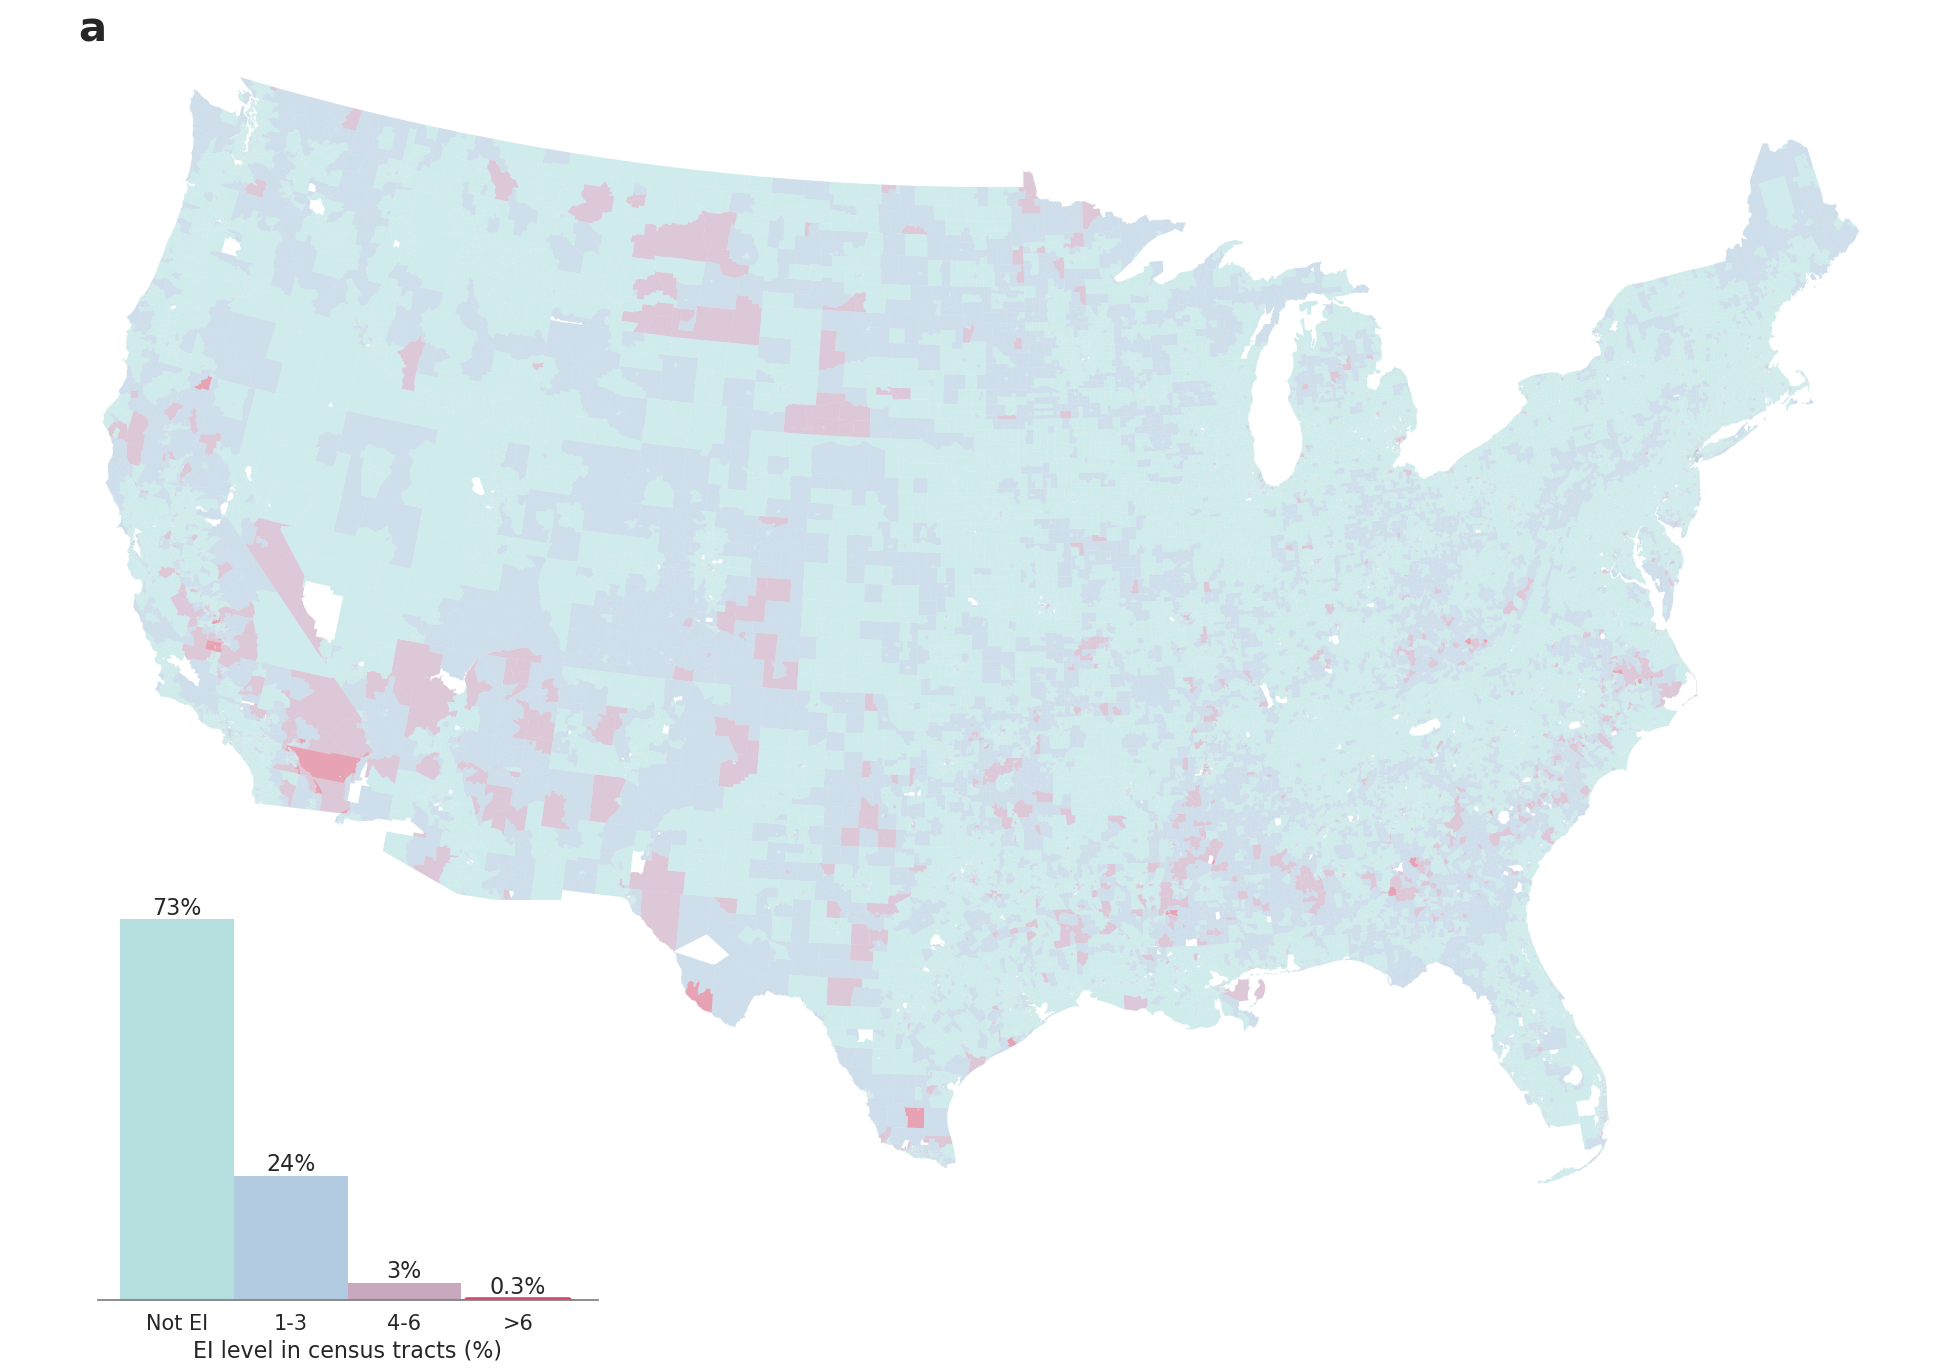

In [39]:

# Load census tract shapefile
tracts = gpd.read_file('/global/scratch/users/cristina_crespo/p1_data/in_us_census/2020_gis_tracts/2020_us_tracts.shp')
tracts = tracts.to_crs("ESRI:102003")  # Convert to appropriate CRS

# Remove Alaska and Hawaii
tracts = tracts[~tracts.STATEFP.isin(["02", "15"])]

# Ensure consistent GEOID format
ei_indicators['GEOID'] = ei_indicators['GEOID'].astype(str).str.zfill(11)
tracts['GEOID'] = tracts['GEOID'].astype(str)

# Merge shapefile with EI Count data
tracts = tracts.merge(ei_indicators[['GEOID', 'Count EI indicators']], on='GEOID', how='right')

# Define four risk colors
#risk_colors =['#a3d8d8', '#9acce0', '#a0bed9', '#a9b0ce', '#b2a1c0', '#ba92b0', '#c2829f', '#c8718d', '#cd5e7b', '#d04969']
risk_colors_hist = ['#a3d8d8', '#a0bed9', '#ba92b0', '#d04969']  # Only 4 colors

# **Update color mapping logic**
bins = [-1, 0, 3, 6, np.inf]  # Define bin edges
labels = [0, 1, 2, 3]  # Corresponding categories

# Assign category index based on 'Count EI indicators'
tracts['color_idx'] = pd.cut(tracts['Count EI indicators'], bins=bins, labels=labels).astype(int)

# Map each level to one of the 4 colors
tracts['color'] = tracts['color_idx'].map(lambda idx: risk_colors_hist[idx])

# Create figure and axis
fig, ax = plt.subplots(figsize=(25, 20))

# Creating the EI_level column based on the same bins
tracts['EI level'] = pd.cut(tracts['Count EI indicators'], bins=bins, labels=labels)

# Plot the map
tracts.plot(column='EI level', ax=ax, color=tracts['color'], edgecolor='none', alpha=0.5)
ax.set(xlim=(-2600000, None))
plt.axis("off")

# Add histogram in bottom left corner
hist_ax = fig.add_axes([0.16, 0.16, 0.2, 0.2])  # Position: left, bottom, width, height

# Cut zero values
hist_risk = tracts.copy()

# Create histogram
counts, bins, patches = hist_ax.hist(hist_risk['EI level'], 
                                     bins=np.arange(-0.5, 4, 1), 
                                     edgecolor='none', alpha=0.8, density=True)  # Normalize for percentages

# Convert counts to percentages
percentages = counts * 100  

# Assign colors to each bar
for patch, color in zip(patches, risk_colors_hist):
    patch.set_facecolor(color)

# Add a red line centered at 0 over the last bin to make it look like a very small bar
last_bin_center = 0.5 * (bins[-2] + bins[-1])  # center of last bar (">6")
bar_width = 0.45
hist_ax.plot(
    [last_bin_center - bar_width, last_bin_center + bar_width],
    [0, 0],
    color='#d04969',
    linewidth=4,
    linestyle='-'
)

# Set title and labels
hist_ax.set_xlabel("EI level in census tracts (%)", fontsize=16)

# Define the dictionary mapping numeric values to labels
ei_xtick_labels = {0: 'Not EI', 1: '1-3', 2: '4-6', 3: '>6'}

# Set x-ticks
hist_ax.set_xticks(list(ei_xtick_labels.keys()))
hist_ax.set_xticklabels(list(ei_xtick_labels.values()), fontsize=15)
hist_ax.tick_params(axis='x', labelsize=15)

# Remove all y-axis elements
hist_ax.set_yticks([])
hist_ax.set_ylabel("")
hist_ax.spines['left'].set_visible(False)

# Customize spines
sns.despine(ax=hist_ax, top=True, right=True, left=True)
hist_ax.spines['bottom'].set_color('grey')

# Add percentage labels on top of each bar
for i, patch in enumerate(patches):
    height = patch.get_height()
    x_position = patch.get_x() + patch.get_width() / 2
    if i == 3:
        label = f'{height * 100:.1f}%'
    else:
        label = f'{height * 100:.0f}%' if height > 0 else ''
    hist_ax.text(x_position, height, label, ha='center', va='bottom', fontsize=16)

ax.text(0.05, 1.01, "a", transform=ax.transAxes, fontsize=30, fontweight='bold', va='top', ha='right')


In [40]:
fig.savefig("map_4_ei_levels.png", bbox_inches='tight', transparent=False, facecolor='white')

[]

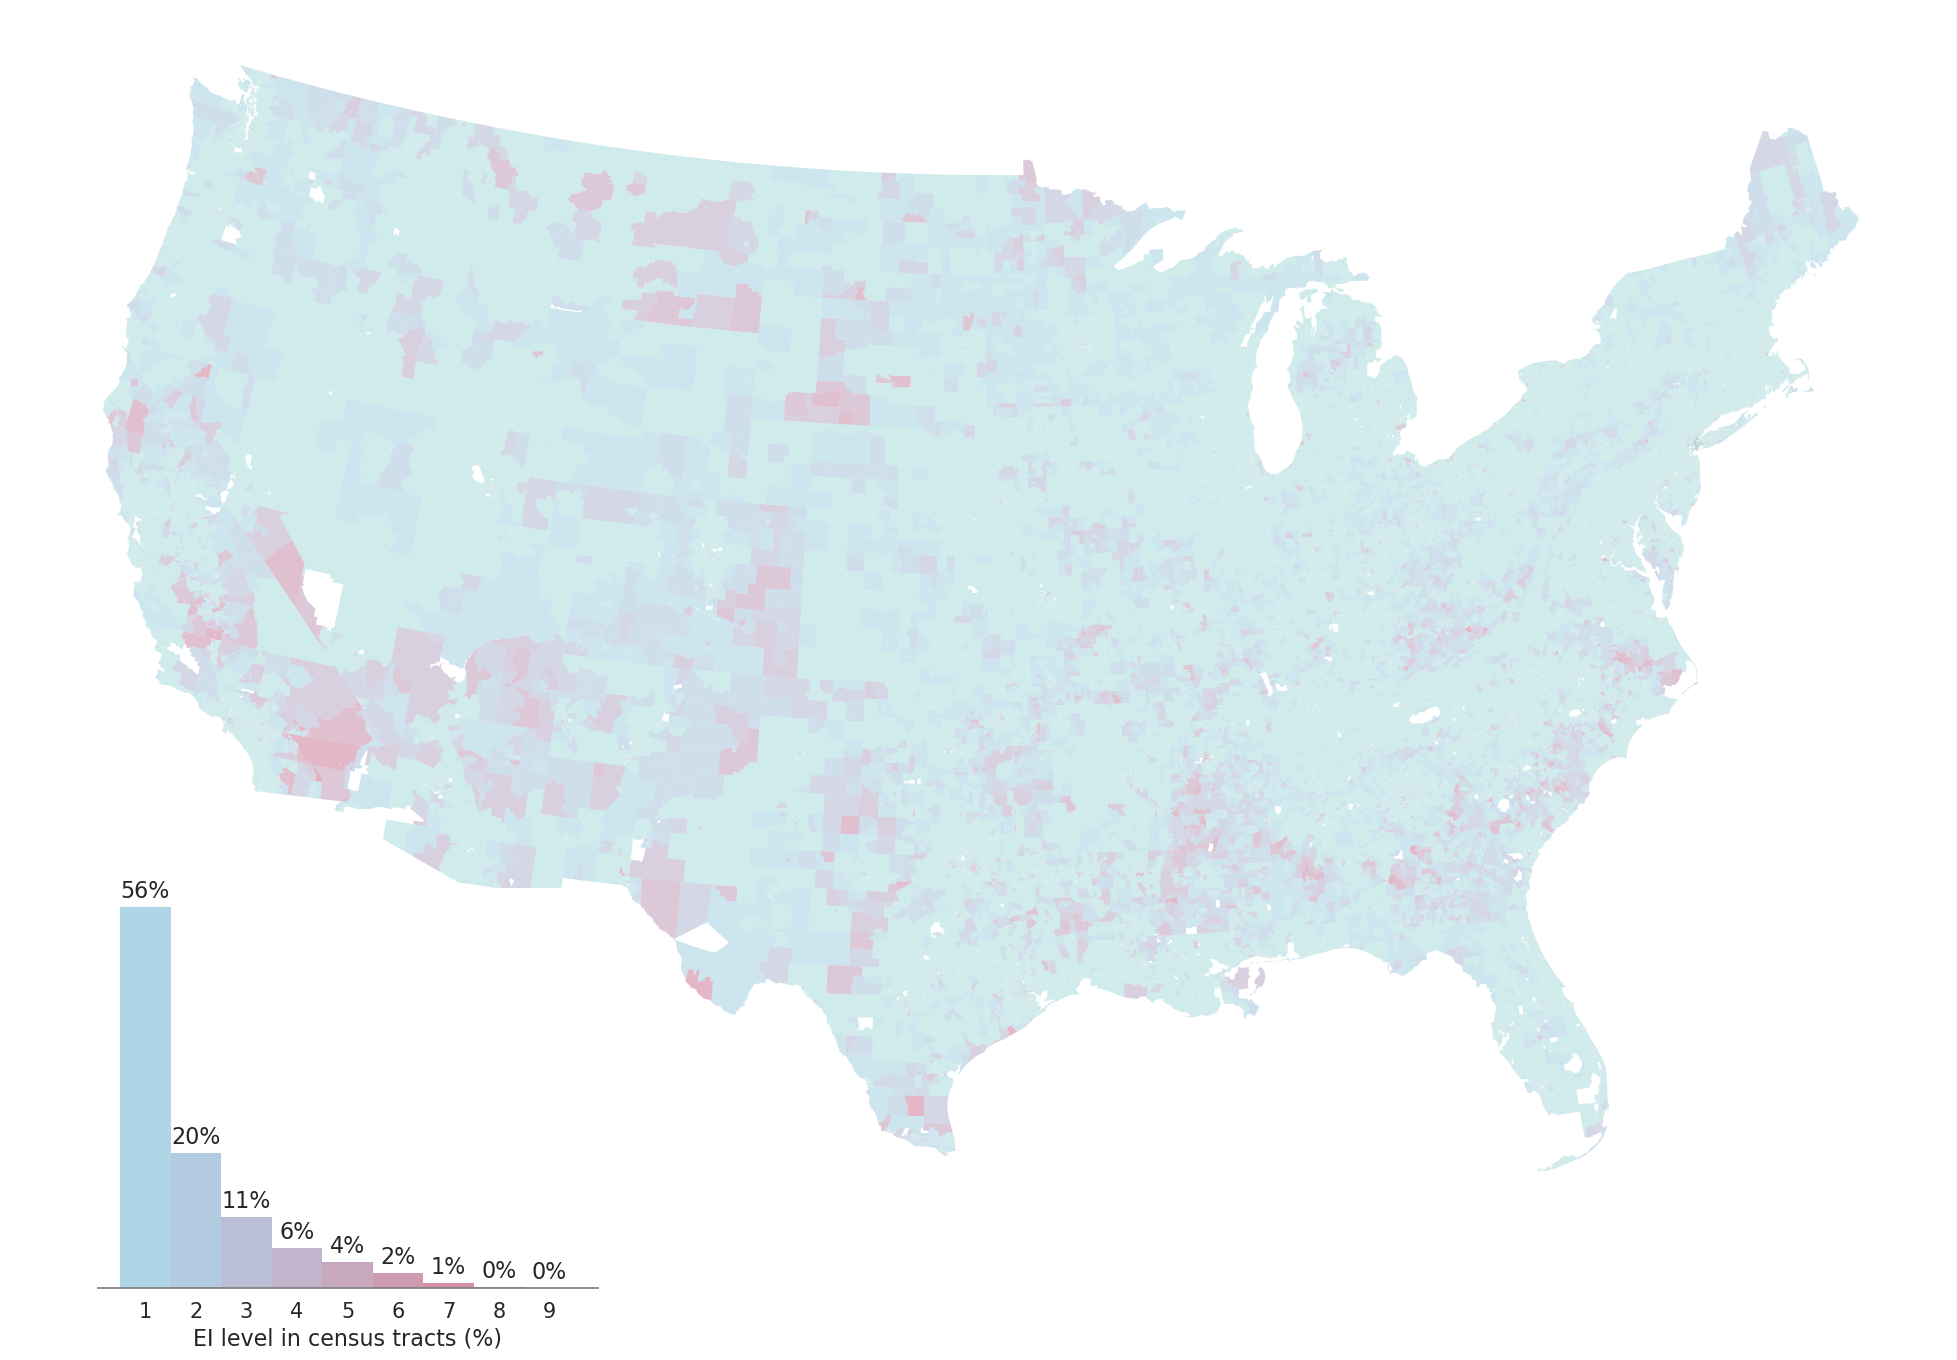

In [45]:
# Load census tract shapefile
tracts = gpd.read_file('/global/scratch/users/cristina_crespo/p1_data/in_us_census/2020_gis_tracts/2020_us_tracts.shp')
tracts = tracts.to_crs("ESRI:102003")  # Convert to appropriate CRS

# Remove Alaska and Hawaii
tracts = tracts[~tracts.STATEFP.isin(["02", "15"])]

# Ensure consistent GEOID format
ei_indicators['GEOID'] = ei_indicators['GEOID'].astype(str).str.zfill(11)
tracts['GEOID'] = tracts['GEOID'].astype(str)

# Merge shapefile with EI Count data
tracts = tracts.merge(ei_indicators[['GEOID', 'Count EI indicators']], on='GEOID', how='right')

# Define color mapping for EI count levels
#risk_colors = ['#e9faff', '#d2ecfd', '#c3ddf5', '#bbcdea', '#b9bbda', '#bba8c8', '#c094b3', '#c67f9c', '#cb6683', '#d04969']
risk_colors =['#a3d8d8', '#9acce0', '#a0bed9', '#a9b0ce', '#b2a1c0', '#ba92b0', '#c2829f', '#c8718d', '#cd5e7b', '#d04969']
# Normalize EI counts to match color range
max_ei_count = tracts['Count EI indicators'].max()
tracts['color_idx'] = np.floor((tracts['Count EI indicators'] / max_ei_count) * (len(risk_colors) - 1)).astype(int)
tracts['color_idx'] = tracts['color_idx'].clip(0, len(risk_colors) - 1)
tracts['color'] = tracts['color_idx'].map(lambda idx: risk_colors[idx])

# Create figure and axis
fig, ax = plt.subplots(figsize=(25, 20))

# Plot the map
tracts.plot(column='Count EI indicators', ax=ax, color=tracts['color'], edgecolor='none', alpha=0.5)
ax.set(xlim=(-2600000, None))
plt.axis("off")

# Add histogram in bottom left corner
hist_ax = fig.add_axes([0.16, 0.16, 0.2, 0.2])  # Position: left, bottom, width, height

# Define colors for each level from 1 to 9
risk_colors_hist = ['#9acce0', '#a0bed9', '#a9b0ce', '#b2a1c0', '#ba92b0', '#c2829f', '#c8718d', '#cd5e7b', '#d04969']

# Filter out zero values
hist_risk = tracts[tracts['Count EI indicators'] != 0]

# Create histogram
counts, bins, patches = hist_ax.hist(hist_risk['Count EI indicators'], 
                                bins=np.arange(0.5, 10.5, 1), 
                                edgecolor='none', alpha=0.8, density=True)  # Normalize for percentages

# Convert counts to percentages
percentages = counts * 100  

# Assign colors to each bar
for patch, color in zip(patches, risk_colors_hist):
    patch.set_facecolor(color)

# Set title and labels
hist_ax.set_xlabel("EI level in census tracts (%)", fontsize=16)
hist_ax.set_ylabel("")   # Change y-axis label to percentage
#hist_ax.set_ylabel("EI level in census tracts (%)", fontsize=16)   # Change y-axis label to percentage
hist_ax.set_xticks(range(1, 10))  # Set x-ticks for values 1-9
hist_ax.tick_params(axis='x', labelsize=15)
# Remove all y-axis elements
hist_ax.set_yticks([])  # Remove y-ticks completely
hist_ax.set_ylabel("")  # Remove y-axis label
hist_ax.spines['left'].set_visible(False)  # Remove left spine

# Customize spines
sns.despine(ax=hist_ax, top=True, right=True, left = True)  # Remove top and right spines
hist_ax.spines['left'].set_color('grey')
hist_ax.spines['bottom'].set_color('grey')

# Add labels on top of each bar
for c in hist_ax.containers:
    labels = [f'{v.get_height()*100:.0f}%' if v.get_height() > 0 else '' for v in c]  # Convert to percentage
    hist_ax.bar_label(c, labels=labels, label_type='edge', fontsize=16, padding=3)  # Adjust font size and padding


# Scale y-axis to percentages
hist_ax.set_yticklabels([f"{int(y*100)}%" for y in hist_ax.get_yticks()])

In [24]:
len(tracts)

82907

----

### Maps for the different indicator dimensions

In [11]:
#to do - RESULTS CSV IS OLD - WHERE WAS IT MADE??
path = '/global/scratch/users/cristina_crespo/p1_data/'
acs_data_raw = pd.read_csv(path +'out_final/ct_enhanced_fig_plotting_results.csv')
acs_data_raw.rename(columns = {'Low Income High Cost (LIHC) - LI': 'Low Income High Cost (LIHC)'}, inplace = True)

acs_data_raw['Reducing basic necessities \n due to energy bill'] = np.where(acs_data_raw['Reducing basic necessities due to energy bill']==1, 1, 0)
acs_data_raw['Keeping home at \n unhealthy temperature'] = np.where(acs_data_raw['Keeping home at unhealthy temperature']==1,  1, 0)
acs_data_raw['Receiving disconnection \n notice'] = np.where(acs_data_raw['Receiving disconnection notice']==1,  1, 0)

In [12]:
df = acs_data_raw[['GEOID', 'Average household members',
 'Average household income', 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice','2M Heating EUI', '2M Cooling EUI']]


In [13]:
# Creating the 'EI physical' column
df['EI Physical'] = df[['Receiving disconnection \n notice', 
                        '2M Heating EUI', 
                        '2M Cooling EUI']].gt(0).sum(axis=1).clip(upper=3)

# Creating the 'EI behavioral' column
df['EI Behavioral'] = df[['M/2 Low absolute energy expenditure',
                          'Reducing basic necessities \n due to energy bill',
                          'Keeping home at \n unhealthy temperature']].gt(0).sum(axis=1).clip(upper=3)

# Creating the 'EI economic' column
df['EI Economic'] = df[['Energy Burden (>6%)', 
                        'Energy Burden (>10%)',
                        '2M Share of energy expenditure', 
                        'Low Income High Cost (LIHC)']].gt(0).sum(axis=1).clip(upper=4)


In [ ]:
# Load census tract shapefile
tracts = gpd.read_file('/global/scratch/users/cristina_crespo/p1_data/in_us_census/2020_gis_tracts/2020_us_tracts.shp')
tracts = tracts.to_crs("ESRI:102003")  # Convert to appropriate CRS

# Remove Alaska and Hawaii
tracts = tracts[~tracts.STATEFP.isin(["02", "15"])]

# Ensure consistent GEOID format
df['GEOID'] = df['GEOID'].astype(str).str.zfill(11)
tracts['GEOID'] = tracts['GEOID'].astype(str)

# Merge shapefile with EI indicator data
tracts = tracts.merge(df[['GEOID', 'EI Physical', 'EI Behavioral', 'EI Economic']], on='GEOID', how='right')

# Define discrete colormap values
color_maps = {
    'EI Physical': {0: '#f0f0f0', 1: '#d9d9d9', 2: '#bdbdbd', 3: '#636363'},  # Shades of gray
    'EI Behavioral': {0: '#fde0dd', 1: '#fa9fb5', 2: '#f768a1', 3: '#7a0177'},  # Shades of pink/red
    'EI Economic': {0: '#deebf7', 1: '#9ecae1', 2: '#3182bd', 3: '#08519c', 4: '#08306b'}  # Shades of blue with an extra dark blue
}

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Labels for subplots
subplot_labels = ['b', 'c', 'd']

for i, (indicator, cmap_dict) in enumerate(color_maps.items()):
    # Create a custom colormap and norm based on predefined values
    cmap = mcolors.ListedColormap(list(cmap_dict.values()))
    bounds = list(cmap_dict.keys()) + [max(cmap_dict.keys()) + 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Plot the map
    tracts.plot(column=indicator, ax=axes[i], cmap=cmap, norm=norm, edgecolor='none', alpha=0.8, legend=False)
    
    # Adjust legend to show discrete values
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    # Create a smaller colorbar with larger tick labels
    cbar = fig.colorbar(sm, ax=axes[i], ticks=list(cmap_dict.keys()), orientation="vertical", fraction=0.02, pad=0.04)
    
    # Increase tick label size
    cbar.ax.tick_params(labelsize=25)

    # Move the tick labels to the center of each color segment
    cbar.set_ticks([(bounds[j] + bounds[j + 1]) / 2 for j in range(len(bounds) - 1)])
    cbar.set_ticklabels(list(cmap_dict.keys()))

    # Add subplot label with bold font
    axes[i].text(0.05, 1, subplot_labels[i], transform=axes[i].transAxes, fontsize=30, fontweight='bold', va='top', ha='right')

    axes[i].set_title(f"{indicator} Levels", fontsize=25)
    axes[i].axis("off")

# Show the plots
plt.tight_layout()

In [45]:
fig.savefig("ei_types_maps.png", bbox_inches='tight', transparent=False, facecolor='white')

##### SI Maps for the 10 different indicators

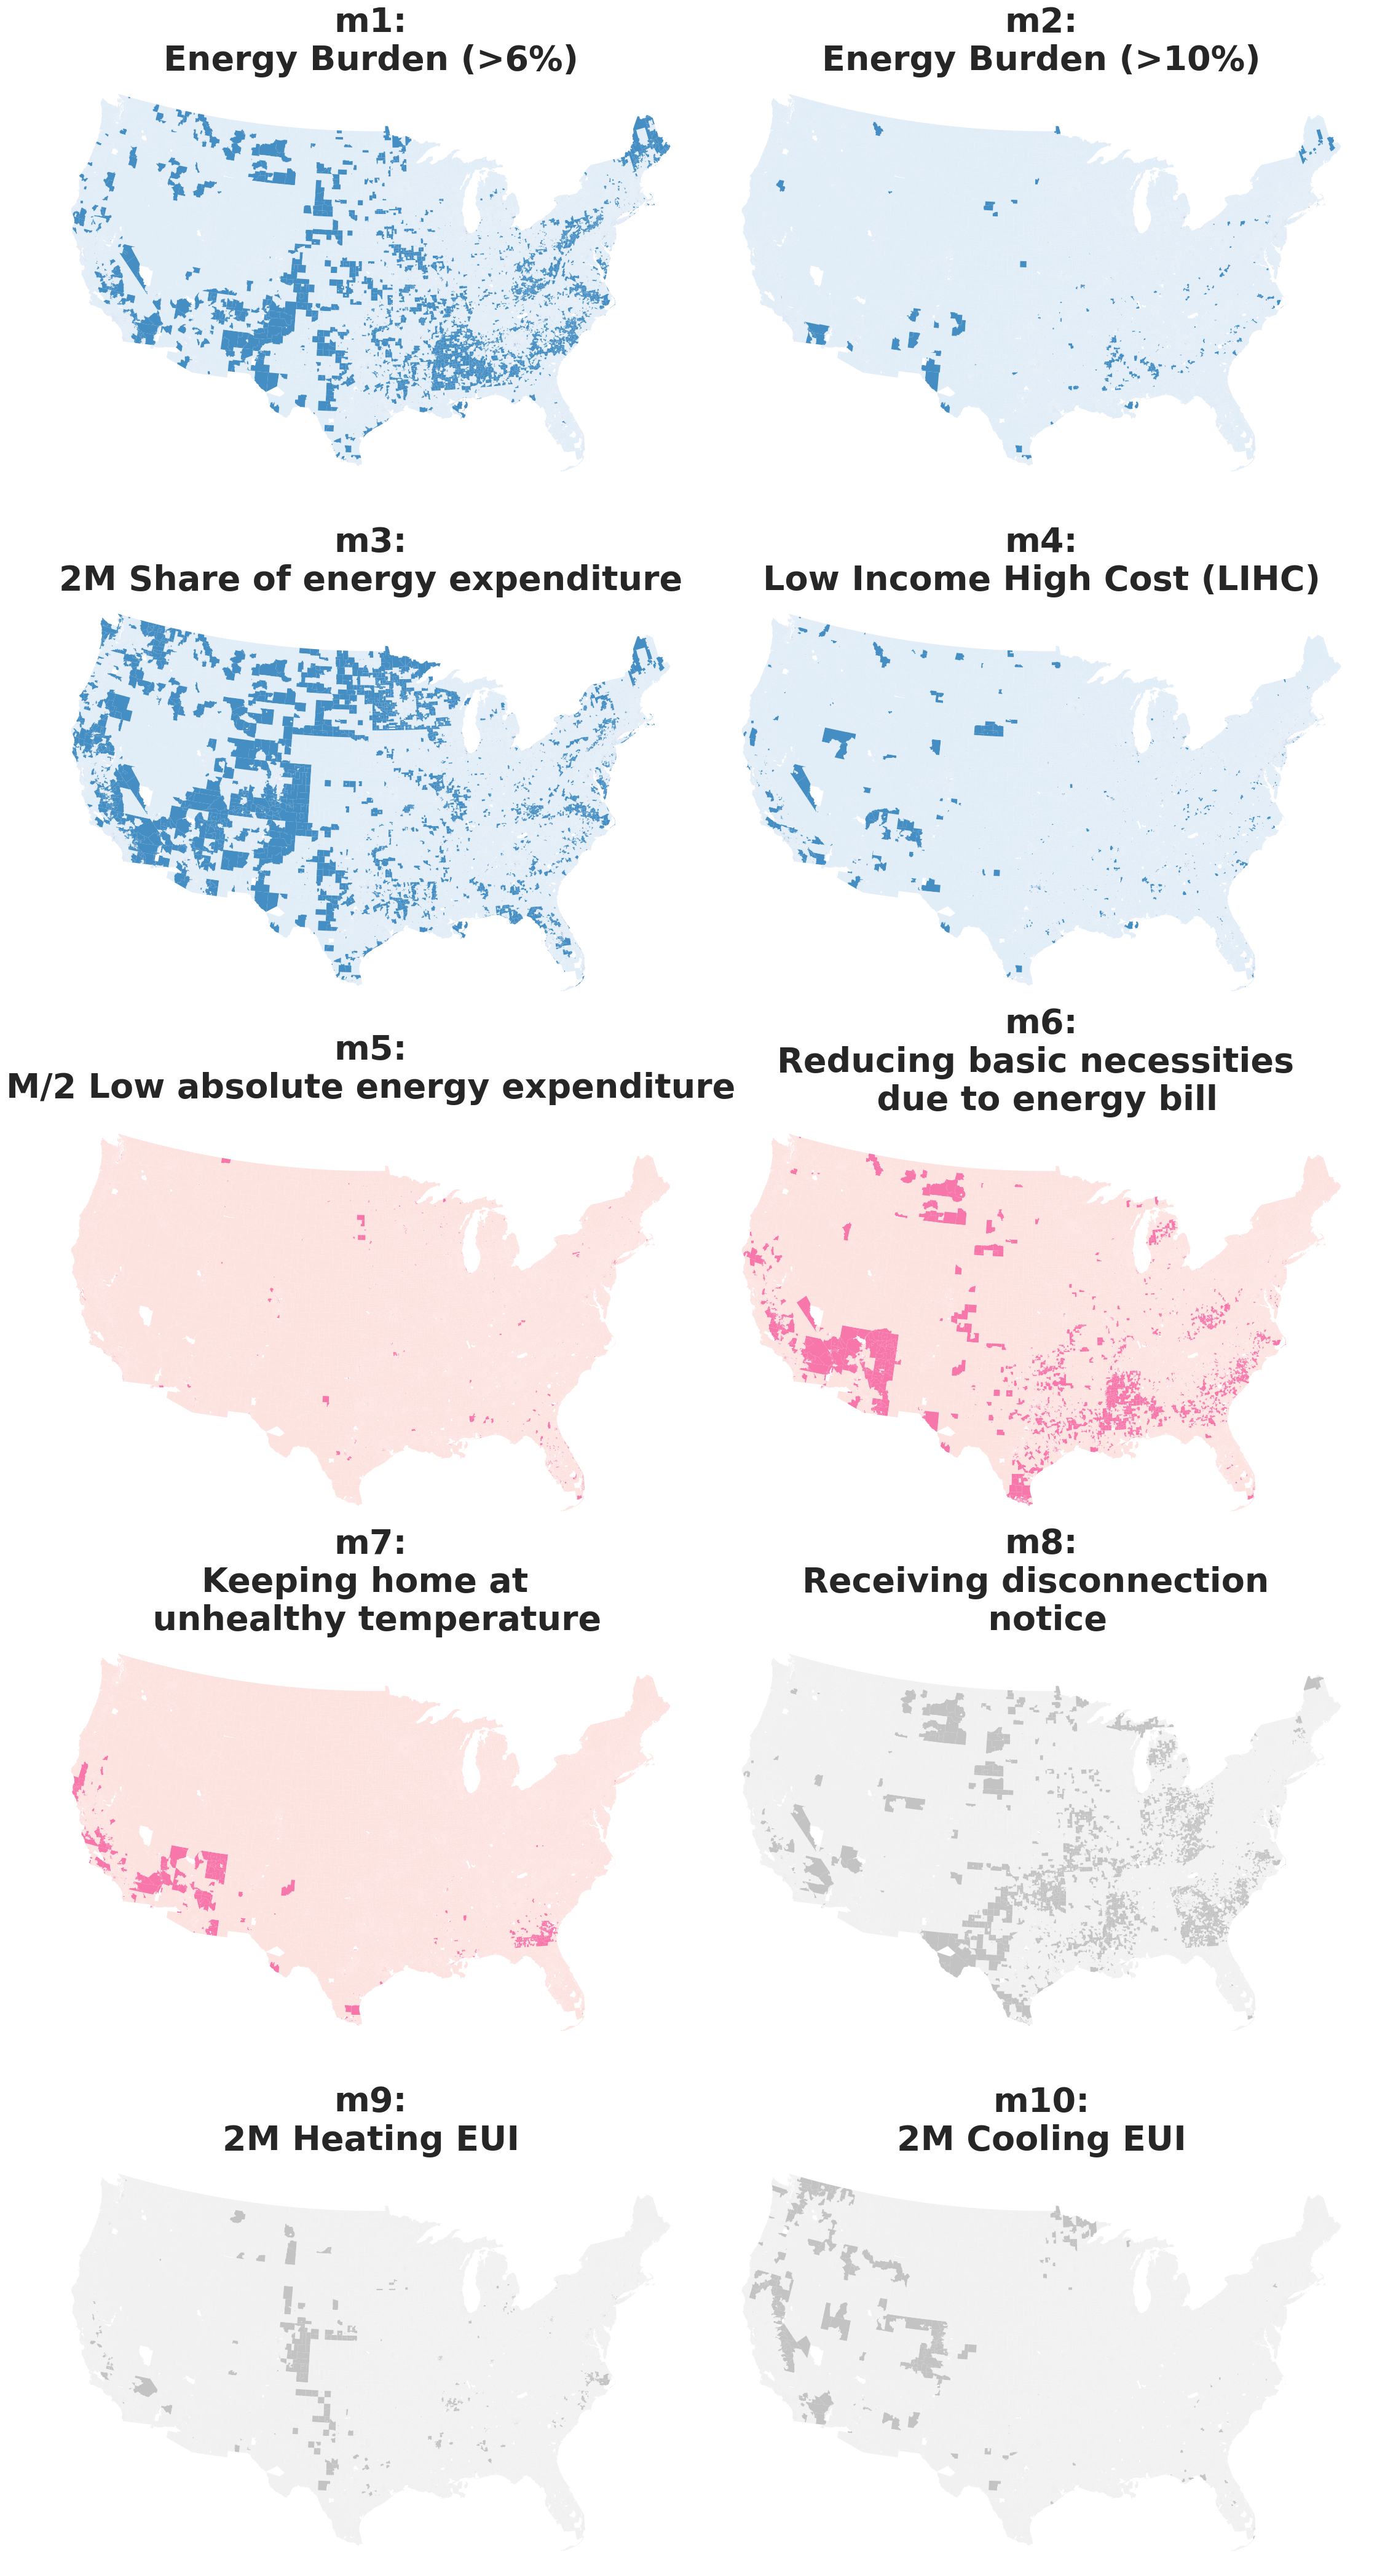

In [14]:
# Load census tract shapefile and convert CRS
#tracts = gpd.read_file('/global/scratch/users/cristina_crespo/p1_data/in_us_census/2020_gis_tracts/2020_us_tracts.shp')
#tracts = tracts.to_crs("ESRI:102003")
#tracts = tracts[~tracts.STATEFP.isin(["02", "15"])]  # Remove AK and HI

# Ensure consistent GEOID formatting
df['GEOID'] = df['GEOID'].astype(str).str.zfill(11)
tracts['GEOID'] = tracts['GEOID'].astype(str)

# Indicator columns and ordering
indicator_cols = [
    'Energy Burden (>6%)', 'Energy Burden (>10%)',
    '2M Share of energy expenditure', 'Low Income High Cost (LIHC)',
    'M/2 Low absolute energy expenditure', 'Reducing basic necessities \n due to energy bill',
    'Keeping home at \n unhealthy temperature', 'Receiving disconnection \n notice',
    '2M Heating EUI', '2M Cooling EUI'
]

# Convert indicators to binary integers
df[indicator_cols] = df[indicator_cols].astype(int)

# Merge with tract geometries
tracts_indicators = tracts.merge(df[['GEOID'] + indicator_cols], on='GEOID', how='right')


# Define binary colormaps
binary_cmaps = {
    'blue': mcolors.ListedColormap(['#deebf7', '#3182bd']),
    'pink': mcolors.ListedColormap(['#fde0dd', '#f768a1']),
    'gray': mcolors.ListedColormap(['#f0f0f0', '#bdbdbd'])
}

# Index-based groupings
blue_indices = [0, 1, 2, 3]
pink_indices = [4, 5, 6]
gray_indices = [7, 8, 9]

# Create figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(22, 42))
axes = axes.flatten()

# Plot each indicator
for i, indicator in enumerate(indicator_cols):
    ax = axes[i]

    # Choose the correct colormap
    if i in blue_indices:
        cmap = binary_cmaps['blue']
    elif i in pink_indices:
        cmap = binary_cmaps['pink']
    elif i in gray_indices:
        cmap = binary_cmaps['gray']
    else:
        cmap = binary_cmaps['gray']  # fallback

    # Define binary norm
    norm = mcolors.BoundaryNorm([0, 0.5, 1], ncolors=2)

    # Plot
    tracts_indicators.plot(
        column=indicator,
        ax=ax,
        cmap=cmap,
        norm=norm,
        edgecolor='none',
        alpha=0.9,
        legend=False
    )

    # Title with prefix
    ax.set_title(f"m{i+1}:\n{indicator}", fontsize=40, weight='bold')
    ax.axis('off')

# Hide unused axes if any
for j in range(len(indicator_cols), len(axes)):
    axes[j].axis('off')

fig.tight_layout()

In [15]:
fig.savefig("SI_all_ei_types_maps.png", bbox_inches='tight', transparent=False, facecolor='white')

In [ ]:
#fig.savefig("SI_all_ei_types_maps.png", bbox_inches='tight', transparent=False, facecolor='white')

----

### Corr plot -  correlation from metric to income and hh members

In [14]:
# Define the mapping of state FIPS codes to census regions
fips_to_region = {
    '01': 'South',    # Alabama
    '02': 'West',     # Alaska
    '04': 'West',     # Arizona
    '05': 'South',    # Arkansas
    '06': 'West',     # California
    '08': 'West',     # Colorado
    '09': 'Northeast',# Connecticut
    '10': 'South',    # Delaware
    '11': 'South',    # District of Columbia
    '12': 'South',    # Florida
    '13': 'South',    # Georgia
    '15': 'West',     # Hawaii
    '16': 'West',     # Idaho
    '17': 'Midwest',  # Illinois
    '18': 'Midwest',  # Indiana
    '19': 'Midwest',  # Iowa
    '20': 'Midwest',  # Kansas
    '21': 'South',    # Kentucky
    '22': 'South',    # Louisiana
    '23': 'Northeast',# Maine
    '24': 'South',    # Maryland
    '25': 'Northeast',# Massachusetts
    '26': 'Midwest',  # Michigan
    '27': 'Midwest',  # Minnesota
    '28': 'South',    # Mississippi
    '29': 'Midwest',  # Missouri
    '30': 'West',     # Montana
    '31': 'Midwest',  # Nebraska
    '32': 'West',     # Nevada
    '33': 'Northeast',# New Hampshire
    '34': 'Northeast',# New Jersey
    '35': 'West',     # New Mexico
    '36': 'Northeast',# New York
    '37': 'South',    # North Carolina
    '38': 'Midwest',  # North Dakota
    '39': 'Midwest',  # Ohio
    '40': 'South',    # Oklahoma
    '41': 'West',     # Oregon
    '42': 'Northeast',# Pennsylvania
    '44': 'Northeast',# Rhode Island
    '45': 'South',    # South Carolina
    '46': 'Midwest',  # South Dakota
    '47': 'South',    # Tennessee
    '48': 'South',    # Texas
    '49': 'West',     # Utah
    '50': 'Northeast',# Vermont
    '51': 'South',    # Virginia
    '53': 'West',     # Washington
    '54': 'South',    # West Virginia
    '55': 'Midwest',  # Wisconsin
    '56': 'West'      # Wyoming
}

# Extract the state FIPS code from the GEOID
df['GEOID'] = df['GEOID'].astype(str).str.zfill(11)
df['StateFIPS'] = df['GEOID'].str[:2]

# Map the state FIPS code to the census region
df['census_regions'] = df['StateFIPS'].map(fips_to_region)

In [15]:
# Grouping by census region and calculating the percentage of non-zero values for each EI category
ei_percentage = df.groupby('census_regions')[['EI Physical', 'EI Behavioral', 'EI Economic']].apply(lambda x: (x.gt(0).sum() / len(x)) * 100)


In [16]:
ei_percentage

EI Physical  EI Behavioral  EI Economic
census_regions                                         
Midwest           13.769579      10.413142    14.408121
Northeast          6.166574      13.521969    12.242770
South             14.537598      18.899823    14.465052
West               3.854888      15.343858    12.954152

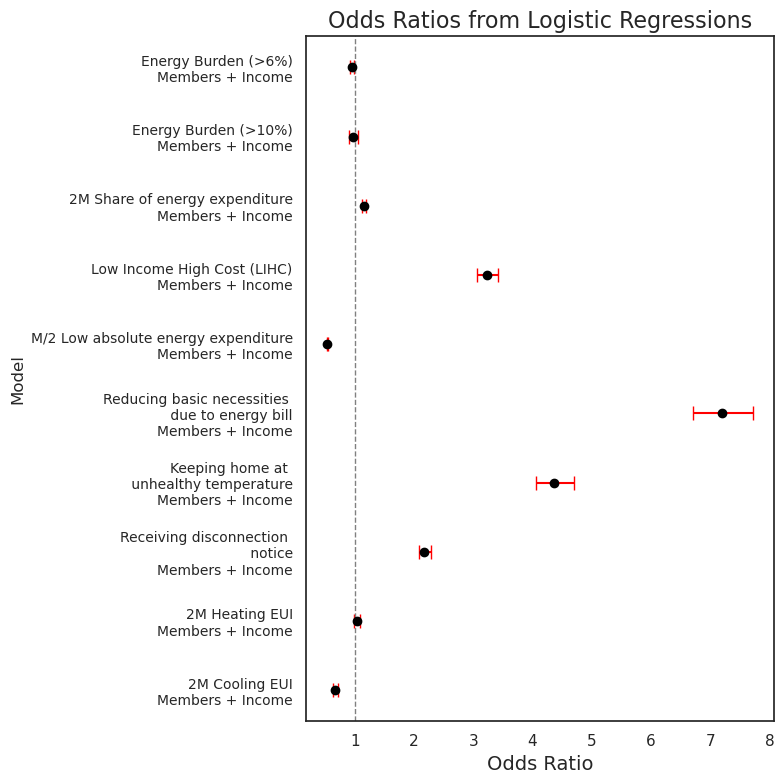

In [81]:
# Define dependent and independent variables (REVERSED order)
y_vars = list(reversed([
    '2M Cooling EUI','2M Heating EUI', 'Receiving disconnection \n notice', 
    'Keeping home at \n unhealthy temperature','Reducing basic necessities \n due to energy bill',
    'M/2 Low absolute energy expenditure','Low Income High Cost (LIHC)', '2M Share of energy expenditure',
    'Energy Burden (>10%)', 'Energy Burden (>6%)'
]))    
    

x_models = [
    (['Average household members', 'Average household income'], 'Members + Income')
]

# Store results for plotting
results = []

# Run logistic regressions sequentially
for y_var in y_vars:
    for x_model, model_name in x_models:
        # Drop NaN values
        data = df[[y_var] + x_model].dropna()
        
        # Define X and Y
        X = sm.add_constant(data[x_model])  # Add constant term
        Y = data[y_var]

        # Fit logistic regression
        model = sm.Logit(Y, X).fit(disp=0)

        # Compute odds ratios and confidence intervals (excluding intercept)
        odds_ratio = np.exp(model.params.iloc[1:])  # Skip intercept
        conf = np.exp(model.conf_int().iloc[1:])  # Skip intercept

        # Store a **single row per model**
        results.append({
            'Model': f"{y_var}\n{model_name}",
            'Odds Ratio': odds_ratio.mean(),  # Use the mean OR if multiple predictors
            'CI Lower': conf.iloc[:, 0].mean(),  # Mean CI lower bound
            'CI Upper': conf.iloc[:, 1].mean()   # Mean CI upper bound
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Reverse the order for plotting
results_df = results_df.iloc[::-1]  # Reverse row order

# Plot odds ratios with swapped axes
fig, ax = plt.subplots(figsize=(8, 8))  # Adjusted size for vertical orientation
ax.errorbar(results_df['Odds Ratio'], results_df['Model'], 
            xerr=[results_df['Odds Ratio'] - results_df['CI Lower'], results_df['CI Upper'] - results_df['Odds Ratio']], 
            fmt='o', color='black', ecolor='red', capsize=5)

# Formatting
ax.axvline(x=1, linestyle='--', color='gray', linewidth=1)  # Reference line at OR = 1
ax.set_xlabel('Odds Ratio', fontsize=14)
ax.set_ylabel('Model', fontsize=12)
ax.set_yticks(range(len(results_df['Model'])))
ax.set_yticklabels(results_df['Model'], fontsize=10)
ax.set_title("Odds Ratios from Logistic Regressions", fontsize=16)

plt.tight_layout()

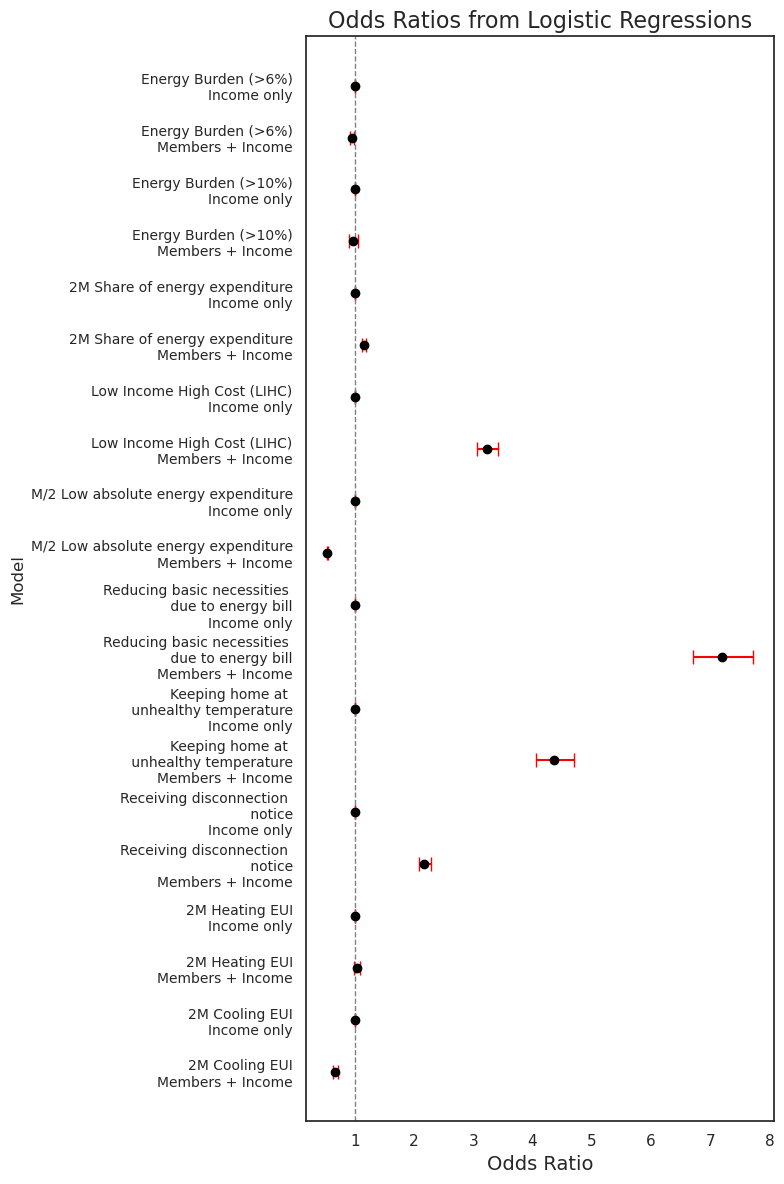

In [82]:
# Define dependent and independent variables (REVERSED order)
y_vars = list(reversed([
    '2M Cooling EUI','2M Heating EUI', 'Receiving disconnection \n notice', 
    'Keeping home at \n unhealthy temperature','Reducing basic necessities \n due to energy bill',
    'M/2 Low absolute energy expenditure','Low Income High Cost (LIHC)', '2M Share of energy expenditure',
    'Energy Burden (>10%)', 'Energy Burden (>6%)'
]))    
    

x_models = [
    (['Average household income'], 'Income only'),
    (['Average household members', 'Average household income'], 'Members + Income')
]

# Store results for plotting
results = []

# Run logistic regressions sequentially
for y_var in y_vars:
    for x_model, model_name in x_models:
        # Drop NaN values
        data = df[[y_var] + x_model].dropna()
        
        # Define X and Y
        X = sm.add_constant(data[x_model])  # Add constant term
        Y = data[y_var]

        # Fit logistic regression
        model = sm.Logit(Y, X).fit(disp=0)

        # Compute odds ratios and confidence intervals (excluding intercept)
        odds_ratio = np.exp(model.params.iloc[1:])  # Skip intercept
        conf = np.exp(model.conf_int().iloc[1:])  # Skip intercept

        # Store a **single row per model**
        results.append({
            'Model': f"{y_var}\n{model_name}",
            'Odds Ratio': odds_ratio.mean(),  # Use the mean OR if multiple predictors
            'CI Lower': conf.iloc[:, 0].mean(),  # Mean CI lower bound
            'CI Upper': conf.iloc[:, 1].mean()   # Mean CI upper bound
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Reverse the order for plotting
results_df = results_df.iloc[::-1]  # Reverse row order

# Plot odds ratios with swapped axes
fig, ax = plt.subplots(figsize=(8, 12))  # Adjusted size for vertical orientation
ax.errorbar(results_df['Odds Ratio'], results_df['Model'], 
            xerr=[results_df['Odds Ratio'] - results_df['CI Lower'], results_df['CI Upper'] - results_df['Odds Ratio']], 
            fmt='o', color='black', ecolor='red', capsize=5)

# Formatting
ax.axvline(x=1, linestyle='--', color='gray', linewidth=1)  # Reference line at OR = 1
ax.set_xlabel('Odds Ratio', fontsize=14)
ax.set_ylabel('Model', fontsize=12)
ax.set_yticks(range(len(results_df['Model'])))
ax.set_yticklabels(results_df['Model'], fontsize=10)
ax.set_title("Odds Ratios from Logistic Regressions", fontsize=16)

plt.tight_layout()

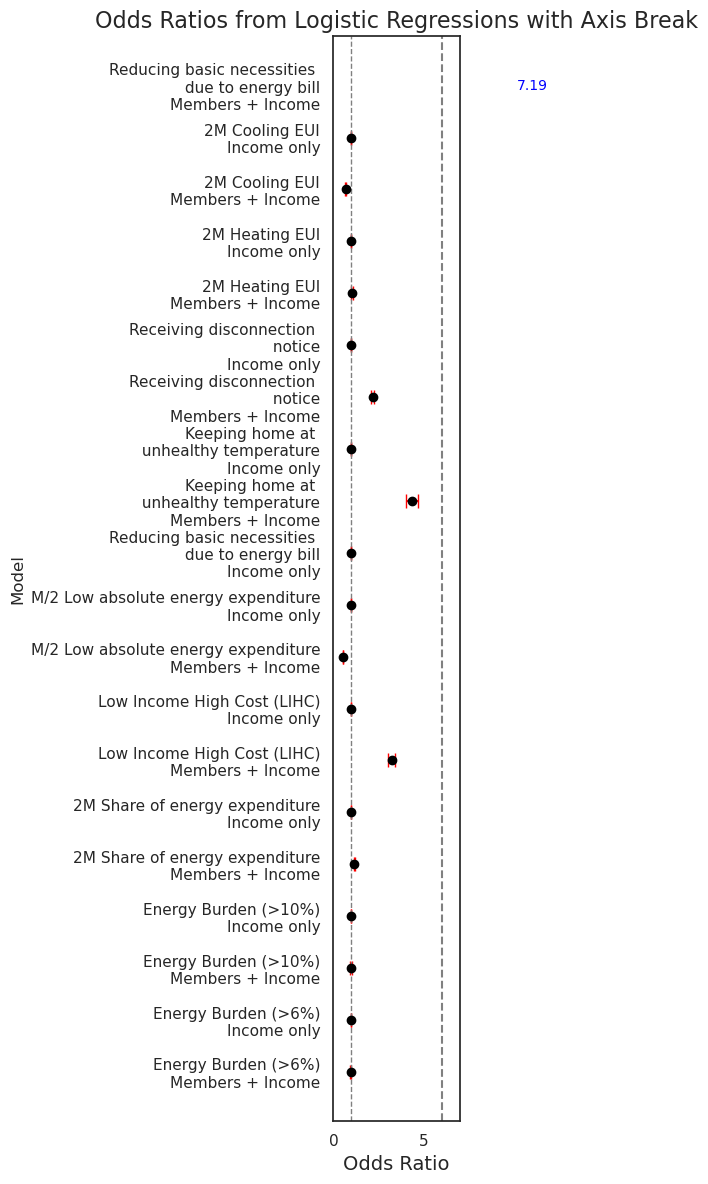

In [83]:
# Define dependent and independent variables (REVERSED order)
y_vars = list(reversed([
    'Energy Burden (>6%)', 'Energy Burden (>10%)', '2M Share of energy expenditure',
    'Low Income High Cost (LIHC)', 'M/2 Low absolute energy expenditure',
    'Reducing basic necessities \n due to energy bill', 'Keeping home at \n unhealthy temperature',
    'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI'
]))

x_models = [
    (['Average household income'], 'Income only'),
    (['Average household members', 'Average household income'], 'Members + Income')
]

# Store results for plotting
results = []

# Run logistic regressions sequentially
for y_var in y_vars:
    for x_model, model_name in x_models:
        # Drop NaN values
        data = df[[y_var] + x_model].dropna()
        
        # Define X and Y
        X = sm.add_constant(data[x_model])  # Add constant term
        Y = data[y_var]

        # Fit logistic regression
        model = sm.Logit(Y, X).fit(disp=0)

        # Compute odds ratios and confidence intervals (excluding intercept)
        odds_ratio = np.exp(model.params.iloc[1:])  # Skip intercept
        conf = np.exp(model.conf_int().iloc[1:])  # Skip intercept

        # Store a **single row per model**
        results.append({
            'Model': f"{y_var}\n{model_name}",
            'Odds Ratio': odds_ratio.mean(),  # Use the mean OR if multiple predictors
            'CI Lower': conf.iloc[:, 0].mean(),  # Mean CI lower bound
            'CI Upper': conf.iloc[:, 1].mean()   # Mean CI upper bound
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Reverse the order for plotting
results_df = results_df.iloc[::-1]  # Reverse row order

# Identify threshold for breaking axis
breakpoint = 6  # Odds ratio where we want to break the axis
high_value = 10  # The outlier value

# Create figure with adjusted x-axis
fig, ax = plt.subplots(figsize=(8, 12))

# Plot regular odds ratios
mask = results_df['Odds Ratio'] < breakpoint
ax.errorbar(results_df.loc[mask, 'Odds Ratio'], results_df.loc[mask, 'Model'], 
            xerr=[results_df.loc[mask, 'Odds Ratio'] - results_df.loc[mask, 'CI Lower'], 
                  results_df.loc[mask, 'CI Upper'] - results_df.loc[mask, 'Odds Ratio']],
            fmt='o', color='black', ecolor='red', capsize=5)

# Plot the outlier separately at the end of the scale
outlier_mask = results_df['Odds Ratio'] >= breakpoint
ax.errorbar([high_value], [results_df.loc[outlier_mask, 'Model'].values[0]], 
            fmt='o', color='blue', markersize=8, label='Outlier')

# Adjust x-axis limits to create a visual break
ax.set_xlim(0, breakpoint + 1)
ax.axvline(x=breakpoint, color='grey', linestyle='--')  # Indicate break

# Add text for the outlier
for i, row in results_df.loc[outlier_mask].iterrows():
    ax.text(high_value + 0.2, row['Model'], f'{row["Odds Ratio"]:.2f}', 
            verticalalignment='center', fontsize=10, color='blue')

# Formatting
ax.axvline(x=1, linestyle='--', color='gray', linewidth=1)  # Reference line at OR = 1
ax.set_xlabel('Odds Ratio', fontsize=14)
ax.set_ylabel('Model', fontsize=12)
ax.set_title("Odds Ratios from Logistic Regressions with Axis Break", fontsize=16)
plt.tight_layout()